## **1η Εργαστηριακή Άσκηση**

### **Μέρος 2 (Kaggle Dataset)**


In [ ]:
!pip install -U imbalanced-learn
!pip install --upgrade imbalanced-learn
!pip install texttable &> /dev/null
!pip install optuna

     |████████████████████████████████| 308 kB 5.0 MB/s 
     |████████████████████████████████| 80 kB 7.7 MB/s 
     |████████████████████████████████| 209 kB 53.7 MB/s 
     |████████████████████████████████| 75 kB 3.8 MB/s 
     |████████████████████████████████| 149 kB 58.0 MB/s 
     |████████████████████████████████| 49 kB 4.8 MB/s 
     |████████████████████████████████| 112 kB 55.7 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=cc3d4e0bdce7e72c051f6af929c5aa7fd6186ecc92afc963d5ecc2e0fd1ce59a
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
from texttable import Texttable
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import optuna
import sklearn.datasets
from sklearn.datasets import fetch_openml
import sklearn.neural_network
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

#Μέρος 2ο: Kaggle Dataset

##Εισαγωγή του dataset στο Google Colab:

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"stelazhara","key":"9a6a10c1c3ec1d01eb4b33c97f314fdf"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d muhakabartay/sloan-digital-sky-survey-dr16

  0% 0.00/6.42M [00:00<?, ?B/s]
100% 6.42M/6.42M [00:00<00:00, 59.3MB/s]


In [ ]:
import os
for dirname, _, filenames in os.walk('/content'):
  for filename in filenames:
    print(os.path.join(dirname,filename))

/content/kaggle.json
/content/sloan-digital-sky-survey-dr16.zip
/content/.config/.last_update_check.json
/content/.config/.last_opt_in_prompt.yaml
/content/.config/active_config
/content/.config/gce
/content/.config/.last_survey_prompt.yaml
/content/.config/config_sentinel
/content/.config/logs/2021.11.18/14.35.36.918574.log
/content/.config/logs/2021.11.18/14.34.49.152157.log
/content/.config/logs/2021.11.18/14.35.09.738473.log
/content/.config/logs/2021.11.18/14.35.58.667492.log
/content/.config/logs/2021.11.18/14.35.57.849518.log
/content/.config/logs/2021.11.18/14.35.29.959577.log
/content/.config/configurations/config_default
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv


In [ ]:
!unzip /content/sloan-digital-sky-survey-dr16.zip

Archive:  /content/sloan-digital-sky-survey-dr16.zip
  inflating: Skyserver_12_30_2019 4_49_58 PM.csv  


In [ ]:
import os
for dirname, _, filenames in os.walk('/content'):
  for filename in filenames:
    print(os.path.join(dirname,filename))

/content/kaggle.json
/content/Skyserver_12_30_2019 4_49_58 PM.csv
/content/sloan-digital-sky-survey-dr16.zip
/content/.config/.last_update_check.json
/content/.config/.last_opt_in_prompt.yaml
/content/.config/active_config
/content/.config/gce
/content/.config/.last_survey_prompt.yaml
/content/.config/config_sentinel
/content/.config/logs/2021.11.18/14.35.36.918574.log
/content/.config/logs/2021.11.18/14.34.49.152157.log
/content/.config/logs/2021.11.18/14.35.09.738473.log
/content/.config/logs/2021.11.18/14.35.58.667492.log
/content/.config/logs/2021.11.18/14.35.57.849518.log
/content/.config/logs/2021.11.18/14.35.29.959577.log
/content/.config/configurations/config_default
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv


In [ ]:
import pandas as pd
df=pd.read_csv('/content/Skyserver_12_30_2019 4_49_58 PM.csv')


##Παρουσίαση του dataset:

Τυπώνοντας τον πίνακα του dataset προκύπτει:

In [ ]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1237667968033620000,228.674917,19.179460,19.32631,18.82748,18.65659,18.60481,18.60917,5237,301,5,134,4448615345201370000,QSO,0.438182,3951,55681,672
99996,1237664818210470000,173.757382,36.441603,18.33687,17.30365,17.16037,17.14895,17.14419,4504,301,2,111,2265404129658560000,STAR,-0.000497,2012,53493,340
99997,1237664295297290000,205.426531,38.499053,17.50690,15.63152,15.22328,15.04469,15.28668,4382,301,4,97,2257446413900210000,GALAXY,0.004587,2005,53472,62
99998,1237656537513130000,337.135144,-9.635967,19.33946,17.21436,16.29697,15.86745,15.51556,2576,301,2,105,811847537492257000,GALAXY,0.084538,721,52228,268


In [ ]:
df['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

Επομένως παρατηρούμε ότι διαθέτουμε συνολικά 100000 δείγματα με 18 τιμές για το καθένα. Τα δείγματα αυτά ανήκουν σε τρείς κατηγορίες: STAR, GALAXY και QSO (quasi stellar object / quasar). Όσον αφορά τις 18 τιμές κάθε δείγματος, μπορούμε να αναφέρουμε ότι οι μεταβλητές αφορούν τα χαρακτηριστικά διαφόρων ουράνιων σωμάτων που κατατάσσονται στις 3 κατηγορίες.

Εξετάζοντας στην συνέχεια την σύνθεση των δεδομένων μας περαιτέρω:

In [ ]:
df['class'].value_counts()

GALAXY    51323
STAR      38096
QSO       10581
Name: class, dtype: int64

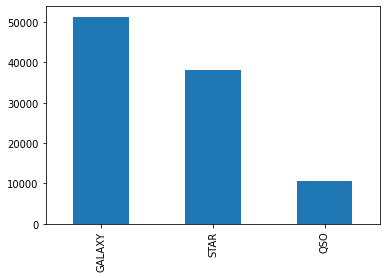

In [ ]:
df['class'].value_counts().plot(kind='bar')

Παρατηρούμε πως το πλήθος δειγμάτων ανά κατηγορία δεν είναι ισοκατανεμημένο, με τα δείγματα γαλαξία να είναι 4 με 5 φορές περισσότερα από τα δείγματα quasar.

Ελέγχουμε επιπλέον αν υπάρχουν απουσιάζουσες τιμές:

In [ ]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

Διαπιστώνουμε πως όλα τα δείγματά μας έχουν και τις 18 τιμές τους μη απουσιάζουσες.

Στην συνέχεια, προκειμένου να λάβουμε μία εικόνα της κατανομής των τιμών των διαφορετικών χαρακτηρηστικών παρουσιάζουμε τα ιστογράμματα για κάθε χαρακτηριστικό. Παρουσιάζουμε επίσης ξανά την κατανομή των δειγμάτων ανά κλάση.

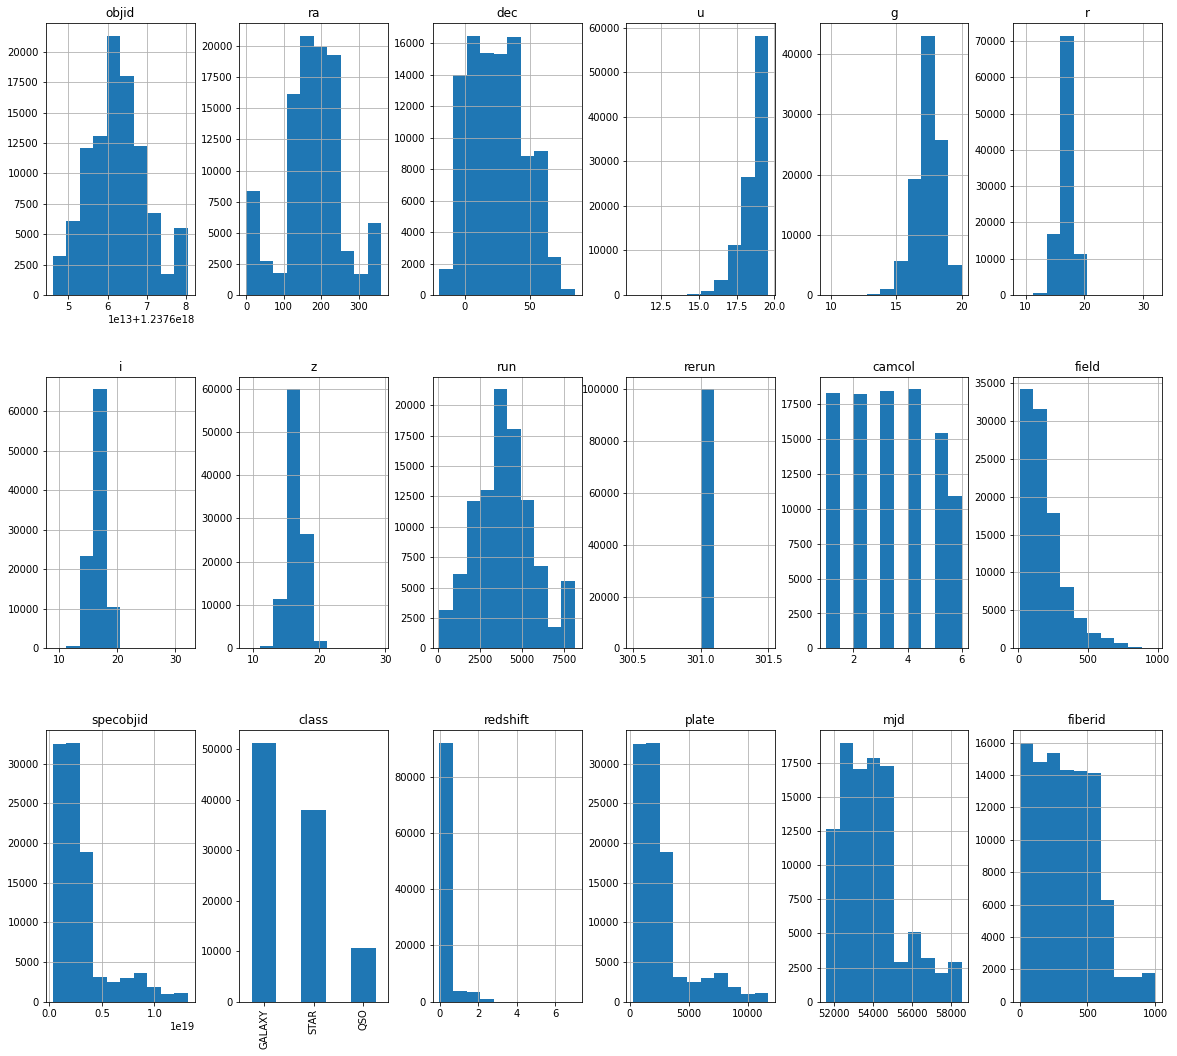

In [ ]:
fig, ax = plt.subplots(3, 6, figsize=(20, 18))
for i in range(0,6):
    df.hist(column=df.columns[i], ax=ax[0][i])
    ax[0][i].set_title(df.columns[i])
for i in range(6,12):
    df.hist(column=df.columns[i], ax=ax[1][i-6])
    ax[1][i-6].set_title(df.columns[i])
for i in range(12,18):
    if df.columns[i]=='class':
      df['class'].value_counts().plot(kind='bar', ax=ax[2][i-12])
      ax[2][i-12].set_title(df.columns[i])
      continue
    df.hist(column=df.columns[i], ax=ax[2][i-12])
    ax[2][i-12].set_title(df.columns[i])

Παρατηρούμε το εύρος τιμών που που λαμβάνουν τα χαρακτηριστικά είναι αρκετά μεγάλο για μερικά από αυτά, ενώ υπάρχουν και χαρακτηριστικά με μικρότερο έως και μοναδιαίο (χαρακτηριστικό rerun) εύρος τιμών.

##Επιλογή μετρικών

Καθώς, όπως αναφέραμε, το dataset δεν είναι ισορροπημένο, επιλέγουμε να μην χρησιμοποιήσουμε την μετρική accuracy. Ο λόγος για αυτό είναι πως η μετρική αυτή σε ένα μη ισχυρά μη ισορροπημένο dataset δεν είναι αντιπροσωπευτική, καθώς το μοντέλο θα κατηγοριοποιεί πολλά δείγματα ως δείγματα της κλάσης με τα περισσότερα στοιχεία και άρα η τιμή accuracy θα προκύπτει υψηλή, χωρίς όμως να είναι ενδεικτική της ικανότητας γενίκευσης του μοντέλου μας για όλες τις κατηγορίες.
Επιλέγουμε λοιπόν να χρησιμοποιήσουμε τις μετρικές precision, recall και F-1 Score. Η μετρική precision είναι ενδεικτική του πόσα από τα αντικείμενα που κατηγοριοποιήθηκαν σε μία κλάση ανήκουν πράγματι σε αυτή. Η μετρική recall αντίθετα αντιπροσωπεύει το ποσοστό των δειγμάτων που ανήκουν σε μια κλάση και κατηριοποιήθηκαν σωστά. Τέλος, το F-1 Score αποτελεί ένα tradeoff μεταξύ των δύο προηγούμενων μετρικών. Επιπλέγουμε να το χρησιμοποιήσουμε καθώς στο συγκεκριμένο πρόβλημα δεν έχουμε κάποιο λόγο να δώσουμε έμφαση σε μία εκ των precision και recall, και άρα είναι χρήσιμη μια μετρική που αποτελεί συμβιβασμό των δύο.

Σημειώνουμε ότι χρησιμοποιούμε weighted precision, recall και F1-score. Ο λόγος γι' αυτό είναι ότι διαθέτουμε imbalanced dataset, γεγονός που επιθυμούμε να λαμβάνεται υπ' όψιν στις μετρικές μας.

##Χωρισμός δεδομένων σε train και test και επιλογή του σχήματος cross-validation

###Χωρισμός σε train και test:

Επιλέγουμε να κρατήσουμε το 70% των δεδομένων μας για εκπαίδευση και το 30% για testing. Τα ποσοστά αυτά εξασφαλίζουν πως θα έχουμε επαρκές πλήθος δειγμάτων για να εκπαιδεύσουμε μοντέλα που θα μπορούν να γενικεύσουν, αλλά παράλληλα θα διαθέτουμε και αρκετά test δεδομένα ώστε η τελική αξιλόγηση των μοντέλων μας να είναι όσο το δυνατόν πιο αντιπροσωπευτική. Στην συνέχεια πραγματοποιούμε τον χωρισμό σε train και test:

Αρχικά δημιουργούμε έναν 1D numpy πίνακα με τις ετικέτες των δεδομένων και αντιστοιχούμε την κάθε κλάση σε μία integer τιμή για μεγαλύτερη προγραμματιστική ευκολία:

In [ ]:
mapping = {label: idx for idx, label in enumerate(np.unique(df['class']))}  # map classes to integers
print('Class mapping is:', mapping)
labels_df = df.loc[:, ['class']] # τα labels είναι στη δεύτερη κολώνα
labels_df = labels_df.replace({"class": mapping})
labels = labels_df.values.flatten() # get labels in numpy array
print('Shape of label array is: ',labels.shape)            # print shape of label array


Class mapping is: {'GALAXY': 0, 'QSO': 1, 'STAR': 2}
Shape of label array is:  (100000,)


Στην συνέχεια δημιοργούμε έναν 2D numpy πίνακα ο οποίος στην γραμμή i έχει τα 17 features του δείγματος i:

In [ ]:
features_df=df.drop(columns=['class'])   # drop label column and keep only features
features=features_df.values                       # convert features to numpy array
print('Shape of feature array is: ',features.shape)

Shape of feature array is:  (100000, 17)


Στην συνέχεια πραγματοποιούμε χωρισμό τον δεδομένων μας σε train και test:

In [ ]:
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.30, random_state=17)
print('Number of train samples:', train.shape[0])
print('Number of test samples:', test.shape[0])

Number of train samples: 70000
Number of test samples: 30000


###Επιλογή σχήματος cross-validation:

Όσον αφορά τη χρήση cross validation, θεωρήθηκε σκόπιμο να χρησιμοποιηθεί για την δημιουργία μιας πληρέστερης και πιθανώς πιο έγκυρης εικόνας για την επίδοση του μοντέλου. Αποφασίσαμε να δουλέψουμε με 5 folds, όσο είναι και η default συνιστώμενη τιμή καθώς θεωρήθηκε πως ήταν μια καλή τιμή ώστε και να δοκιμαστεί το μοντέλο σε διαφορετικά υποσύνολα αλλά και για να μην υπάρξει χρονική επιβάρυνση από τις εκτεταμένες δοκιμές.

##Επίδοση out-of-the-box

Αρχικά εξετάζουμε την συμπεριφορά εκτιμητών χωρίς καμία βελτιστοποίηση και με default τιμές παραμέτρων για το συγκεκριμένο dataset. Συγκεκριμένα, εκπαιδεύουμε τους εκτιμητές ΜLP (Multi-Layer Perceptron) και SVM (Support Vector Machines). Χρησιμοποιούμε επίσης έναν dummy ταξινομητή χάριν σύγκρισης:

###Εκπαίδευση εκτιμητών:

In [ ]:
dummy_clf = DummyClassifier()                          # initialize dummy classifier
dummy_model = dummy_clf.fit(train, train_labels)       # fit classifier
dummy_preds= dummy_model.predict(test)                 # calculate predictions on test set

In [ ]:
mlp_clf = MLPClassifier()                            # initialize MLP classifier
mlp_model = mlp_clf.fit(train, train_labels)         # fit classifier
mlp_preds= mlp_model.predict(test)                   # calculate predictions on test set

In [ ]:
svm_clf = SVC()                                      # initialize SVM classifier
svm_model = svm_clf.fit(train, train_labels)         # fit classifier
svm_preds= svm_model.predict(test)                   # calculate predictions on test set

###Αξιολόγηση επίδοσης εκτιμητών:

Στην συνέχεια αξιολογούμε την επίδοση των εκτιμητών που εκπαιδεύσαμε, χρησιμοποιώντας τις μετρικές που επιλέξαμε νωρίτερα:

In [ ]:
dummy_metrics=precision_recall_fscore_support(test_labels, dummy_preds, average=None)  # get precision, recall, F-1 score and support for estimator
mlp_metrics=precision_recall_fscore_support(test_labels, mlp_preds, average=None)
svm_metrics=precision_recall_fscore_support(test_labels, svm_preds, average=None)
dummy_mean_metrics=precision_recall_fscore_support(test_labels, dummy_preds, average='weighted')  # get weighted (average) precision, recall, F-1 score and support for estimator
mlp_mean_metrics=precision_recall_fscore_support(test_labels, mlp_preds, average='weighted')
svm_mean_metrics=precision_recall_fscore_support(test_labels, svm_preds, average='weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Παρουσιάζουμε αρχικά τις μετρικές ανά κλάση:

In [ ]:
t = Texttable()

columns = [['Classifier','Precision: galaxy','Precision: QSO','Precision: star','Recall: galaxy','Recall: QSO','Recall: star','F1-score: galaxy','F1-score: QSO','F1-score: star']]
rows = ["Dummy","MLP","SVM"]
columns.append([rows[0],dummy_metrics[0][0],dummy_metrics[0][1],dummy_metrics[0][2],dummy_metrics[1][0],dummy_metrics[1][1],dummy_metrics[1][2],dummy_metrics[2][0],dummy_metrics[2][1],dummy_metrics[2][2]])
columns.append([rows[1],mlp_metrics[0][0],mlp_metrics[0][1],mlp_metrics[0][2],mlp_metrics[1][0],mlp_metrics[1][1],mlp_metrics[1][2],mlp_metrics[2][0],mlp_metrics[2][1],mlp_metrics[2][2]])
columns.append([rows[2],svm_metrics[0][0],svm_metrics[0][1],svm_metrics[0][2],svm_metrics[1][0],svm_metrics[1][1],svm_metrics[1][2],svm_metrics[2][0],svm_metrics[2][1],svm_metrics[2][2]])
t.add_rows(columns)
print(t.draw())

+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+
| Class | Preci | Preci | Preci | Recal | Recal | Recal | F1-sc | F1-sc | F1-s |
| ifier | sion: | sion: | sion: | l: ga |  l:   |  l:   | ore:  | ore:  | core |
|       | galax |  QSO  | star  | laxy  |  QSO  | star  | galax |  QSO  |  :   |
|       |   y   |       |       |       |       |       |   y   |       | star |
+=======+=======+=======+=======+=======+=======+=======+=======+=======+======+
| Dummy | 0.513 | 0     | 0     | 1     | 0     | 0     | 0.678 | 0     | 0    |
+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+
| MLP   | 0.625 | 0.422 | 0.784 | 0.968 | 0.055 | 0.394 | 0.760 | 0.097 | 0.52 |
|       |       |       |       |       |       |       |       |       | 5    |
+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+
| SVM   | 0.686 | 0     | 0.633 | 0.822 | 0     | 0.636 | 0.748 | 0     | 0.63 |
|       |       |       |   

Παρατηρούμε πως και οι τρεις μετρικές λαμβάνουν μεγαλύτερη τιμή στην περίπτωση της κλάσης "galaxy". Αυτό είναι αναμενόμενο, καθώς η κλάση αυτή διαθέτει πολύ περισσότερα δείγματα από τις άλλες δύο κλάσεις. Για τον ίδιο λόγο οι ταξινομητές έχουν τις χαμηλότερες μετρικές για την κλάση "QSO", για την οποία διαθέτουμε λιγότερα δείγματα. Παρατηρούμε ότι έχουμε για αυτήν σχεδόν μηδενικό recall, το οποίο δηλώνει ότι τα περισσότερα από τα δείγματα της κλάσης δεν κατηγοριοποίθηκαν σωστά.
Σχολιάζοντας τώρα γενικά τους εκτιμητές, μπορούμε να παρατηρήσουμε πως οι MLP και SVM έχουν γενικά αρκετά καλύτερα αποτελέσματα από τον dummy, ιδιαίτερα στην περίπτωση τον κλάσεων "galaxy" και "star", ωστόσο τα αποτελέσματα αυτά δεν είναι ικανοποιητικά, ιδιαίτερα όσον αφορά την κλάση "QSO".

Στην συνέχεια παρουσιάζουμε τους μέσους όρους των μετρικών:

In [ ]:
t = Texttable()

columns = [['Classifier','Weighted Precision', 'Weighted Recall', 'Weighted F1-score']]
rows = ["Dummy","MLP","SVM"]
columns.append([rows[0],dummy_mean_metrics[0],dummy_mean_metrics[1],dummy_mean_metrics[2]])
columns.append([rows[1],mlp_mean_metrics[0],mlp_mean_metrics[1],mlp_mean_metrics[2]])
columns.append([rows[2],svm_mean_metrics[0],svm_mean_metrics[1],svm_mean_metrics[2]])
t.add_rows(columns)
print(t.draw())

+------------+--------------------+-----------------+-------------------+
| Classifier | Weighted Precision | Weighted Recall | Weighted F1-score |
+============+====================+=================+===================+
| Dummy      | 0.263              | 0.513           | 0.348             |
+------------+--------------------+-----------------+-------------------+
| MLP        | 0.665              | 0.653           | 0.601             |
+------------+--------------------+-----------------+-------------------+
| SVM        | 0.594              | 0.665           | 0.626             |
+------------+--------------------+-----------------+-------------------+


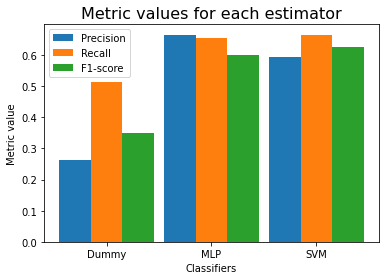

In [ ]:
X = ['Dummy','MLP','SVM']
Yprecision = [dummy_mean_metrics[0],mlp_mean_metrics[0],svm_mean_metrics[0]]
Yrecall = [dummy_mean_metrics[1],mlp_mean_metrics[1],svm_mean_metrics[1]]
Yf1score = [dummy_mean_metrics[2],mlp_mean_metrics[2],svm_mean_metrics[2]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.3, Yprecision, 0.3, label = 'Precision')
plt.bar(X_axis , Yrecall, 0.3, label = 'Recall')
plt.bar(X_axis + 0.3, Yf1score, 0.3, label = 'F1-score')

plt.xticks(X_axis, X)
plt.xlabel("Classifiers")
plt.ylabel("Metric value")
plt.title("Metric values for each estimator", fontsize=16)
plt.legend()
plt.show()

Παρατηρούμε πως οι MLP και SVM εκτιμητές έχουν καλύτερα αποτελέσματα από τον dummy. Ωστόσο, τα ποσοστά που επιτυγχάνονται εξακολουθούν να είναι αρκετά χαμηλά. Αξίζει επίσης να σχολιάσουμε πως τα ποσοστά 40% με 58% που εμφανίζονται εδώ δεν είναι πλήρως αντιπροσωπευτικά: Οι επιδόσεις των ταξινομητών για την κλαση "QSO" είναι όπως αναφέραμε νωρίτερα σχεδόν μηδενικές, γεγονός που δεν είναι προφανές από τις μέσες τιμές των μετρικών που βλέπουμε στον παραπάνω πίνακα.

##Βελτιστοποίηση

###Προεπεξεργασία

####Μείωση διάστασης με χρήση variance threshold

Αρχικά, όπως παρατηρήσαμε κατά την παρουσίασαη των ιστογραμμάτων για κάθε χαρακτηριστικό, υπάρχουν χαρακτηριστικά με μεγαλύτερο ή με μικρότερο εύρος τιμών, ενώ ένα χαρακτηρηστικό έχει σταθερή τιμή. Χαρακτηριστικά με σταθερή τιμή ή πολύ μικρό variance δεν συνεισφέρουν ή συνεισφέρουν πολύ λίγο αντίστοιχα στην διαχωριστική ικανότητα του ταξινομητή, ενώ μπορεί να δυσκολεύουν άλλες διαδικασίες της προεπεξεργασίας όπως η κανονικοποίηση των χαρακτηρηστικών. Για τον λόγο αυτό επιλέγουμε να τα αφαιρέσουμε:

In [ ]:
selector = VarianceThreshold()      # initialize selector
train_reduced = selector.fit_transform(train)   # fit to train data

mask = selector.get_support() # mask that decides if the selector will keep each attribute
print('Mask is:')
print(mask)

test_reduced = selector.transform(test)  # we assume that test data has zero variance in the same features with test data
print('Dataset with reduced dimensions has {} features.'.format(test_reduced.shape[1]))

Mask is:
[ True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True]
Dataset with reduced dimensions has 16 features.


Στην συνέχεια, εξετάζουμε τις τιμές variance των υπολοίπων χαρακτηριστικών, καθώς ενδεχομένως είναι χρήσιμο να αφαιρέσουμε και χαρακτηρηστικά με πολύ μικρό variance:

In [ ]:
Xvar = np.var(train_reduced, axis=0)
print('Variance values are:')
print(Xvar)

Variance values are:
[5.29020696e+25 6.09694818e+03 4.23758937e+02 6.94561891e-01
 9.74402289e-01 1.28660377e+00 1.46520246e+00 1.64209104e+00
 2.86782704e+06 2.63043043e+00 1.98881612e+04 6.19421260e+36
 1.92863556e-01 4.88630837e+06 2.39361127e+06 4.71520586e+04]


Διαπιστώνουμε πως διαθέτουμε χαρακτηριστικά με πολύ μεγάλο variance και χαρακτηριστικά με αρκετά μικρό. Επιλέγουμε να θέσουμε το κατώφλι 0.4 για το variance των χαρακτηριστικών που θα κρατήσουμε και εξετάζουμε τα προκύπτοντα αποτελέσματα:

In [ ]:
selector = VarianceThreshold(threshold=0.4)
train_reduced_1 = selector.fit_transform(train_reduced)
mask = selector.get_support()
print('Mask is:')
print(mask)
test_reduced_1 = test_reduced[:,mask]

print('Dataset with reduced dimensions has {} features.'.format(test_reduced_1.shape[1]))

Mask is:
[ True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True]
Dataset with reduced dimensions has 15 features.


Παρατηρούμε ότι απορρίφθηκε ένα ακόμη χαρακτηρηστικό μετά την παραπάνω διαδικασία.

Σημείωση: Η επιλογή του κατωφλίου σε 0.4 έγινε μετά από πειραματισμούς, προκειμένου να προσδιοριστεί το βέλτιστο κατώφλι για τις επιδόσεις των εκτιμητών. Οι πειραματισμοί παρουσιάζονται στην συνέχεια:

#####Πειραματισμοί με το κατώφλι του variance:

######Κατώφλι 0:

In [ ]:
folds=5

dummy_clf = DummyClassifier()                          # initialize dummy classifier
dummy_precision=cross_val_score(dummy_clf,train_reduced,train_labels,cv=folds,scoring='precision_weighted')   # calculate precision with cross validation
dummy_recall=cross_val_score(dummy_clf,train_reduced,train_labels,cv=folds,scoring='recall_weighted')         # calculate recall with cross validation
dummy_f1=cross_val_score(dummy_clf,train_reduced,train_labels,cv=folds,scoring='f1_weighted')                 # calculate F1-score with cross validation

mlp_clf = MLPClassifier()                            # initialize MLP classifier
mlp_precision=cross_val_score(mlp_clf,train_reduced,train_labels,cv=folds,scoring='precision_weighted')
mlp_recall=cross_val_score(mlp_clf,train_reduced,train_labels,cv=folds,scoring='recall_weighted')
mlp_f1=cross_val_score(mlp_clf,train_reduced,train_labels,cv=folds,scoring='f1_weighted')

svm_clf = SVC()                                      # initialize SVM classifier
svm_precision=cross_val_score(svm_clf,train_reduced,train_labels,cv=folds,scoring='precision_weighted')
svm_recall=cross_val_score(svm_clf,train_reduced,train_labels,cv=folds,scoring='recall_weighted')
svm_f1=cross_val_score(svm_clf,train_reduced,train_labels,cv=folds,scoring='f1_weighted')



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Pr

In [ ]:
# print in table:
t = Texttable()
columns = [['Classifier','Weighted Precision', 'Weighted Recall', 'Weighted F1-score']]
rows = ["Dummy","MLP","SVM"]
columns.append([rows[0],np.mean(dummy_precision),np.mean(dummy_recall),np.mean(dummy_f1)])
columns.append([rows[1],np.mean(mlp_precision),np.mean(mlp_recall),np.mean(mlp_f1)])
columns.append([rows[2],np.mean(svm_precision),np.mean(svm_recall),np.mean(svm_f1)])
t.add_rows(columns)
print(t.draw())

+------------+--------------------+-----------------+-------------------+
| Classifier | Weighted Precision | Weighted Recall | Weighted F1-score |
+============+====================+=================+===================+
| Dummy      | 0.263              | 0.513           | 0.348             |
+------------+--------------------+-----------------+-------------------+
| MLP        | 0.561              | 0.521           | 0.494             |
+------------+--------------------+-----------------+-------------------+
| SVM        | 0.590              | 0.663           | 0.623             |
+------------+--------------------+-----------------+-------------------+


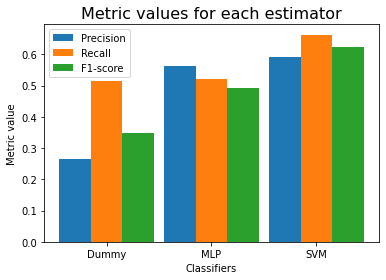

In [ ]:
X = ['Dummy','MLP','SVM']
Yprecision = [np.mean(dummy_precision),np.mean(mlp_precision),np.mean(svm_precision)]
Yrecall = [np.mean(dummy_recall),np.mean(mlp_recall),np.mean(svm_recall)]
Yf1score = [np.mean(dummy_f1),np.mean(mlp_f1),np.mean(svm_f1)]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.3, Yprecision, 0.3, label = 'Precision')
plt.bar(X_axis , Yrecall, 0.3, label = 'Recall')
plt.bar(X_axis + 0.3, Yf1score, 0.3, label = 'F1-score')

plt.xticks(X_axis, X)
plt.xlabel("Classifiers")
plt.ylabel("Metric value")
plt.title("Metric values for each estimator", fontsize=16)
plt.legend()
plt.show()

######Κατώφλι 0.4:

In [ ]:
selector = VarianceThreshold(threshold=0.4)                      # set variance threshold
train_reduced_1 = selector.fit_transform(train_reduced)          # fit selector
mask = selector.get_support()                                    # get mask that chooses which data will be kept
print('Mask is:')
print(mask)
test_reduced_1 = test_reduced[:,mask]                            # keep features of test data according to mask too

print('Dataset with reduced dimensions has {} features.'.format(test_reduced_1.shape[1]))

Mask is:
[ True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True]
Dataset with reduced dimensions has 15 features.


In [ ]:
folds=5

dummy_clf = DummyClassifier()                          # initialize dummy classifier
dummy_precision=cross_val_score(dummy_clf,train_reduced_1,train_labels,cv=folds,scoring='precision_weighted')   # calculate precision with cross validation
dummy_recall=cross_val_score(dummy_clf,train_reduced_1,train_labels,cv=folds,scoring='recall_weighted')         # calculate recall with cross validation
dummy_f1=cross_val_score(dummy_clf,train_reduced_1,train_labels,cv=folds,scoring='f1_weighted')                 # calculate F1-score with cross validation

mlp_clf = MLPClassifier()                            # initialize MLP classifier
mlp_precision=cross_val_score(mlp_clf,train_reduced_1,train_labels,cv=folds,scoring='precision_weighted')
mlp_recall=cross_val_score(mlp_clf,train_reduced_1,train_labels,cv=folds,scoring='recall_weighted')
mlp_f1=cross_val_score(mlp_clf,train_reduced_1,train_labels,cv=folds,scoring='f1_weighted')

svm_clf = SVC()                                      # initialize SVM classifier
svm_precision=cross_val_score(svm_clf,train_reduced_1,train_labels,cv=folds,scoring='precision_weighted')
svm_recall=cross_val_score(svm_clf,train_reduced_1,train_labels,cv=folds,scoring='recall_weighted')
svm_f1=cross_val_score(svm_clf,train_reduced_1,train_labels,cv=folds,scoring='f1_weighted')

# print in table:
t = Texttable()
columns = [['Classifier','Weighted Precision', 'Weighted Recall', 'Weighted F1-score']]
rows = ["Dummy","MLP","SVM"]
columns.append([rows[0],np.mean(dummy_precision),np.mean(dummy_recall),np.mean(dummy_f1)])
columns.append([rows[1],np.mean(mlp_precision),np.mean(mlp_recall),np.mean(mlp_f1)])
columns.append([rows[2],np.mean(svm_precision),np.mean(svm_recall),np.mean(svm_f1)])
t.add_rows(columns)
print(t.draw())

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Pr

+------------+--------------------+-----------------+-------------------+
| Classifier | Weighted Precision | Weighted Recall | Weighted F1-score |
+============+====================+=================+===================+
| Dummy      | 0.263              | 0.513           | 0.348             |
+------------+--------------------+-----------------+-------------------+
| MLP        | 0.635              | 0.600           | 0.594             |
+------------+--------------------+-----------------+-------------------+
| SVM        | 0.590              | 0.663           | 0.623             |
+------------+--------------------+-----------------+-------------------+


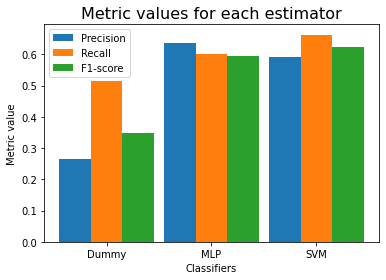

In [ ]:
X = ['Dummy','MLP','SVM']
Yprecision = [np.mean(dummy_precision),np.mean(mlp_precision),np.mean(svm_precision)]
Yrecall = [np.mean(dummy_recall),np.mean(mlp_recall),np.mean(svm_recall)]
Yf1score = [np.mean(dummy_f1),np.mean(mlp_f1),np.mean(svm_f1)]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.3, Yprecision, 0.3, label = 'Precision')
plt.bar(X_axis , Yrecall, 0.3, label = 'Recall')
plt.bar(X_axis + 0.3, Yf1score, 0.3, label = 'F1-score')

plt.xticks(X_axis, X)
plt.xlabel("Classifiers")
plt.ylabel("Metric value")
plt.title("Metric values for each estimator", fontsize=16)
plt.legend()
plt.show()

######Κατώφλι 1:

In [ ]:
selector = VarianceThreshold(threshold=1)                        # set variance threshold
train_reduced_2 = selector.fit_transform(train_reduced)          # fit selector
mask = selector.get_support()                                    # get mask that chooses which data will be kept
print('Mask is:')
print(mask)
test_reduced_2 = test_reduced[:,mask]                            # keep features of test data according to mask too

print('Dataset with reduced dimensions has {} features.'.format(test_reduced_2.shape[1]))

Mask is:
[ True  True  True False False  True  True  True  True  True  True  True
 False  True  True  True]
Dataset with reduced dimensions has 13 features.


In [ ]:
dummy_clf = DummyClassifier()                          # initialize dummy classifier
dummy_precision=cross_val_score(dummy_clf,train_reduced_2,train_labels,cv=folds,scoring='precision_weighted')   # calculate precision with cross validation
dummy_recall=cross_val_score(dummy_clf,train_reduced_2,train_labels,cv=folds,scoring='recall_weighted')         # calculate recall with cross validation
dummy_f1=cross_val_score(dummy_clf,train_reduced_2,train_labels,cv=folds,scoring='f1_weighted')                 # calculate F1-score with cross validation

mlp_clf = MLPClassifier()                            # initialize MLP classifier
mlp_precision=cross_val_score(mlp_clf,train_reduced_2,train_labels,cv=folds,scoring='precision_weighted')
mlp_recall=cross_val_score(mlp_clf,train_reduced_2,train_labels,cv=folds,scoring='recall_weighted')
mlp_f1=cross_val_score(mlp_clf,train_reduced_2,train_labels,cv=folds,scoring='f1_weighted')

svm_clf = SVC()                                      # initialize SVM classifier
svm_precision=cross_val_score(svm_clf,train_reduced_2,train_labels,cv=folds,scoring='precision_weighted')
svm_recall=cross_val_score(svm_clf,train_reduced_2,train_labels,cv=folds,scoring='recall_weighted')
svm_f1=cross_val_score(svm_clf,train_reduced_2,train_labels,cv=folds,scoring='f1_weighted')

# print in table:
t = Texttable()
columns = [['Classifier','Weighted Precision', 'Weighted Recall', 'Weighted F1-score']]
rows = ["Dummy","MLP","SVM"]
columns.append([rows[0],np.mean(dummy_precision),np.mean(dummy_recall),np.mean(dummy_f1)])
columns.append([rows[1],np.mean(mlp_precision),np.mean(mlp_recall),np.mean(mlp_f1)])
columns.append([rows[2],np.mean(svm_precision),np.mean(svm_recall),np.mean(svm_f1)])
t.add_rows(columns)
print(t.draw())

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Pr

+------------+--------------------+-----------------+-------------------+
| Classifier | Weighted Precision | Weighted Recall | Weighted F1-score |
+============+====================+=================+===================+
| Dummy      | 0.263              | 0.513           | 0.348             |
+------------+--------------------+-----------------+-------------------+
| MLP        | 0.620              | 0.541           | 0.580             |
+------------+--------------------+-----------------+-------------------+
| SVM        | 0.590              | 0.663           | 0.623             |
+------------+--------------------+-----------------+-------------------+


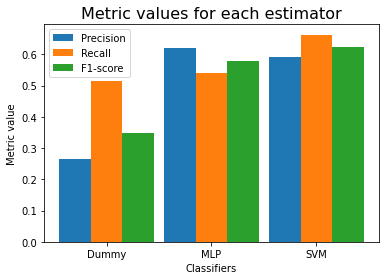

In [ ]:
X = ['Dummy','MLP','SVM']
Yprecision = [np.mean(dummy_precision),np.mean(mlp_precision),np.mean(svm_precision)]
Yrecall = [np.mean(dummy_recall),np.mean(mlp_recall),np.mean(svm_recall)]
Yf1score = [np.mean(dummy_f1),np.mean(mlp_f1),np.mean(svm_f1)]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.3, Yprecision, 0.3, label = 'Precision')
plt.bar(X_axis , Yrecall, 0.3, label = 'Recall')
plt.bar(X_axis + 0.3, Yf1score, 0.3, label = 'F1-score')

plt.xticks(X_axis, X)
plt.xlabel("Classifiers")
plt.ylabel("Metric value")
plt.title("Metric values for each estimator", fontsize=16)
plt.legend()
plt.show()

#####Σχολιασμός:

Παρατηρούμε ότι με αλλαγή του variance threshold σε 0, 0.4 και 1 οι επιδόσεις των Dummy και SVM ταξινομητών δεν επηρεάζονται, ενώ ο MLP παρουσιάζει λίγο καλύτερες επιδόσεις για variance threshold 0.4. Επομένως επιλέγουμε να θέσουμε το κατώλφι σε αυτήν την τιμή.

####Κανονικοποίηση δεδομένων

Αφού έχουμε μειώσει επαρκώς την διάσταση των χαρακτηριστικών προχωράμε στην κανονικοποίηση των δεδομένων. Επιλέγουμε να πραγματοποιήσουμε κανονικοποίηση, ώστε να μην επιδρούν περισσότερο στην εκπαίδευση του ταξινομητή ορισμένα χαρακτηριστικά επειδή απλώς έχουν μεγαλύτερες τιμές. Θα δοκιμάσουμε να κανονικοποιήσουμε τα δεδομένα χρησιμοποιώντς 2 διαφορετικές τεχνικές: το normalization (minmax scaling) και το standardization και θα συγκρίνουμε τι συμβαίνει σε κάθε περίπτωση.


Επίσης, πρέπει να αναφερθεί πως όταν κάνουμε μετασχηματισμό κανονικοποίησης στο train set θα πρέπει αντίστοιχα να προσαρμόσουμε και τα δεδομένα του test set, χρησιμοποιώντας τη μέση τιμή και την απόκλιση που υπολογίσαμε για το train set.

#####Standardization




In [ ]:
scaler = preprocessing.StandardScaler().fit(train_reduced_1)
train_scaled = scaler.transform(train_reduced_1)   # transform train data
test_scaled = scaler.transform(test_reduced_1)     # transform test data

Αξιολογούμε τους εκτιμητές μετά την κανονικοποίηση:

In [ ]:
folds=5

dummy_clf = DummyClassifier()                          # initialize dummy classifier
dummy_precision=cross_val_score(dummy_clf,train_scaled,train_labels,cv=folds,scoring='precision_weighted')   # calculate precision with cross validation
dummy_recall=cross_val_score(dummy_clf,train_scaled,train_labels,cv=folds,scoring='recall_weighted')         # calculate recall with cross validation
dummy_f1=cross_val_score(dummy_clf,train_scaled,train_labels,cv=folds,scoring='f1_weighted')                 # calculate F1-score with cross validation

mlp_clf = MLPClassifier()                            # initialize MLP classifier
mlp_precision=cross_val_score(mlp_clf,train_scaled,train_labels,cv=folds,scoring='precision_weighted')
mlp_recall=cross_val_score(mlp_clf,train_scaled,train_labels,cv=folds,scoring='recall_weighted')
mlp_f1=cross_val_score(mlp_clf,train_scaled,train_labels,cv=folds,scoring='f1_weighted')

svm_clf = SVC()                                      # initialize SVM classifier
svm_precision=cross_val_score(svm_clf,train_scaled,train_labels,cv=folds,scoring='precision_weighted')
svm_recall=cross_val_score(svm_clf,train_scaled,train_labels,cv=folds,scoring='recall_weighted')
svm_f1=cross_val_score(svm_clf,train_scaled,train_labels,cv=folds,scoring='f1_weighted')



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Pr

Παρουσιάζουμε τις επιδόσεις σε πίνακα και bar plot:

In [ ]:
# print in table:
t = Texttable()
columns = [['Classifier','Weighted Precision', 'Weighted Recall', 'Weighted F1-score']]
rows = ["Dummy","MLP","SVM"]
columns.append([rows[0],np.mean(dummy_precision),np.mean(dummy_recall),np.mean(dummy_f1)])
columns.append([rows[1],np.mean(mlp_precision),np.mean(mlp_recall),np.mean(mlp_f1)])
columns.append([rows[2],np.mean(svm_precision),np.mean(svm_recall),np.mean(svm_f1)])
t.add_rows(columns)
print(t.draw())

+------------+--------------------+--------------+------------------------+
| Classifier | Weighted Precision | Macro Recall | Macro F1-score (macro) |
+============+====================+==============+========================+
| Dummy      | 0.263              | 0.513        | 0.348                  |
+------------+--------------------+--------------+------------------------+
| MLP        | 0.963              | 0.963        | 0.962                  |
+------------+--------------------+--------------+------------------------+
| SVM        | 0.945              | 0.945        | 0.945                  |
+------------+--------------------+--------------+------------------------+


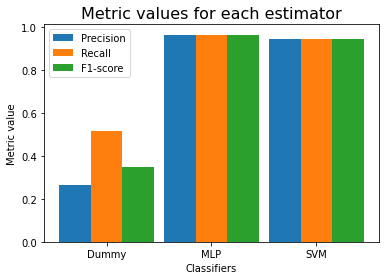

In [ ]:
X = ['Dummy','MLP','SVM']
Yprecision = [np.mean(dummy_precision),np.mean(mlp_precision),np.mean(svm_precision)]
Yrecall = [np.mean(dummy_recall),np.mean(mlp_recall),np.mean(svm_recall)]
Yf1score = [np.mean(dummy_f1),np.mean(mlp_f1),np.mean(svm_f1)]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.3, Yprecision, 0.3, label = 'Precision')
plt.bar(X_axis , Yrecall, 0.3, label = 'Recall')
plt.bar(X_axis + 0.3, Yf1score, 0.3, label = 'F1-score')

plt.xticks(X_axis, X)
plt.xlabel("Classifiers")
plt.ylabel("Metric value")
plt.title("Metric values for each estimator", fontsize=16)
plt.legend()
plt.show()

#####Min max scaling



In [ ]:
#min max scaling
min_max_scaler = preprocessing.MinMaxScaler()
train_minmax = min_max_scaler.fit_transform(train_reduced_1)
test_minmax = min_max_scaler.transform(train_reduced_1)

Αξιολογούμε τους εκτιμητές μετά την κανονικοποίηση:

In [ ]:
folds=5

dummy_clf = DummyClassifier()                          # initialize dummy classifier
dummy_precision=cross_val_score(dummy_clf,train_minmax,train_labels,cv=folds,scoring='precision_weighted')   # calculate precision with cross validation
dummy_recall=cross_val_score(dummy_clf,train_minmax,train_labels,cv=folds,scoring='recall_weighted')         # calculate recall with cross validation
dummy_f1=cross_val_score(dummy_clf,train_minmax,train_labels,cv=folds,scoring='f1_weighted')                 # calculate F1-score with cross validation

mlp_clf = MLPClassifier()                            # initialize MLP classifier
mlp_precision=cross_val_score(mlp_clf,train_minmax,train_labels,cv=folds,scoring='precision_weighted')
mlp_recall=cross_val_score(mlp_clf,train_minmax,train_labels,cv=folds,scoring='recall_weighted')
mlp_f1=cross_val_score(mlp_clf,train_minmax,train_labels,cv=folds,scoring='f1_weighted')

svm_clf = SVC()                                      # initialize SVM classifier
svm_precision=cross_val_score(svm_clf,train_minmax,train_labels,cv=folds,scoring='precision_weighted')
svm_recall=cross_val_score(svm_clf,train_minmax,train_labels,cv=folds,scoring='recall_weighted')
svm_f1=cross_val_score(svm_clf,train_minmax,train_labels,cv=folds,scoring='f1_weighted')


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Pr

Παρουσιάζουμε τις επιδόσεις σε πίνακα και bar plot:

In [ ]:
# print in table:
t = Texttable()
columns = [['Classifier','Weighted Precision', 'Weighted Recall', 'Weighted F1-score']]
rows = ["Dummy","MLP","SVM"]
columns.append([rows[0],np.mean(dummy_precision),np.mean(dummy_recall),np.mean(dummy_f1)])
columns.append([rows[1],np.mean(mlp_precision),np.mean(mlp_recall),np.mean(mlp_f1)])
columns.append([rows[2],np.mean(svm_precision),np.mean(svm_recall),np.mean(svm_f1)])
t.add_rows(columns)
print(t.draw())


+------------+--------------------+-----------------+-------------------+
| Classifier | Weighted Precision | Weighted Recall | Weighted F1-score |
+============+====================+=================+===================+
| Dummy      | 0.263              | 0.513           | 0.348             |
+------------+--------------------+-----------------+-------------------+
| MLP        | 0.939              | 0.936           | 0.939             |
+------------+--------------------+-----------------+-------------------+
| SVM        | 0.909              | 0.909           | 0.909             |
+------------+--------------------+-----------------+-------------------+


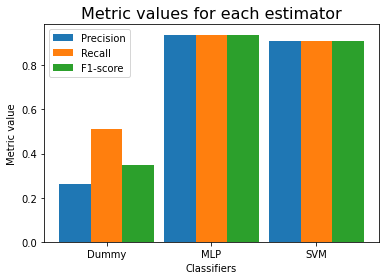

In [ ]:
X = ['Dummy','MLP','SVM']
Yprecision = [np.mean(dummy_precision),np.mean(mlp_precision),np.mean(svm_precision)]
Yrecall = [np.mean(dummy_recall),np.mean(mlp_recall),np.mean(svm_recall)]
Yf1score = [np.mean(dummy_f1),np.mean(mlp_f1),np.mean(svm_f1)]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.3, Yprecision, 0.3, label = 'Precision')
plt.bar(X_axis , Yrecall, 0.3, label = 'Recall')
plt.bar(X_axis + 0.3, Yf1score, 0.3, label = 'F1-score')

plt.xticks(X_axis, X)
plt.xlabel("Classifiers")
plt.ylabel("Metric value")
plt.title("Metric values for each estimator", fontsize=16)
plt.legend()
plt.show()

#####Σχολιασμός:

Παρατηρούμε πως με την μέθοδο της κανονικοποίησης έχουμε πολύ μεγάλη βελτίωση των μετρικών Precision, Recall και F1-score για τους εκτιμητές MLP και SVM. Αυτό ισχύει και για τις δύο μεθόδους, ελαφρώς όμως καλύτερες επιδόσεις επιτυγχάνονται με την μέθοδο standardization, και επομένως επιλέγουμε την εφαρμογή της μεθόδου αυτής στα δεδομένα.  Ο λόγος για τον οποίο το standardization προσφέρει καλύτερα αποτελέσματα είναι ότι σε σχέση με το normalization, που κανονικοποιεί τις τιμές εντός του πεδίου [0,1], δεν επηρεάζει τις αποκλίνουσες τιμές και μας βοηθάει να έχουμε μια καλύτερη ιδέα της απόκλισης, που εν τέλει συντελεί στην καλύτερη επίδοση του μοντέλου. Ακόμα, με τη μέθοδο standardization τα δεδομένα μετασχηματίζονται ώστε να ακολουθούν την κανονική κατανομή, με την οποία τείνει να μοιάζει αρκετά και η κατανομή των τιμών για τα διάφορα χαρακτηριστικά (βλ. Παρουσίαση dataset).

####Εξισορρόπηση dataset

Το dataset, όπως είδαμε και παραπάνω δεν είναι ισορροπημένο και υπάρχει μεγάλη διαφορά ανάμεσα στον αριθμό των δειγμάτων από κάθε κατηγoρία. Αυτό μπορεί να δημιουργήσει προβλήματα κατά το training, αφού μπορεί να εισάγει κάποιο bias που λειτουργεί υπέρ κάποιας πολυπληθέστερης κατηγορίας, το οποίο θα θέλαμε να αποφύγουμε. Για την εξισορρόπηση θα συγκρίνουμε δύο μεθόδους εξισορρόπησης του dataset, το undersampling και το oversampling.

Στην αρχή, ελέγχουμε πόσα δείγματα υπάρχουν από κάθε κλάση στο train set:

In [ ]:
print((train_labels==0).sum())
print((train_labels==1).sum())
print((train_labels==2).sum())

35931
7452
26617


#####Oversampling

Αφού βλέπουμε πως δεν είναι ισορροπημένη η παρουσία των τριών κλάσεων, προχωράμε σε εξισορρόπηση, αρχικά με τη μέθοδο Oversampling. Με τη μέθοδο  Oversampling, εξισορροπούμε το dataset εξισώνοντας τον αριθμό δειγμάτων σε κάθε κατηγορία με το αριθμό δειγμάτων που είχε η πολυπληθέστερη κατηγορία. Στην δική μας περίπτωση, βλέπουμε ότι η κλάση 0 έχει τα περισσότερα δείγματα, οπότε στο τέλος της εξισορρόπησης και οι 3 κλάσεις θα έχουν τον ίδιο αριθμό δειγμάτων με αυτήν.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MultiLabelBinarizer

#initialize RandomOverSampler
ros = RandomOverSampler()
train_resampled, train_labels_resampled = ros.fit_resample(train_scaled, train_labels)  # transform data
print(train_resampled.shape)
print(train_labels_resampled.shape)
print(train_labels_resampled)

(107793, 15)
(107793,)
[0 2 0 ... 2 2 2]


Τέλος, επιβεβαιώνουμε ότι όλες οι κλάσεις έχουν τον ίδιο αριθμό δειγμάτων:

In [ ]:
print((train_labels_resampled==0).sum())
print((train_labels_resampled==1).sum())
print((train_labels_resampled==2).sum())

35931
35931
35931


Ελέγχουμε τις επιδόσεις των ταξινομητών μας με τα νέα δεδομένα:

In [ ]:
folds=5

dummy_clf = DummyClassifier()                          # initialize dummy classifier
dummy_precision=cross_val_score(dummy_clf,train_resampled,train_labels_resampled,cv=folds,scoring='precision_weighted')   # calculate precision with cross validation
dummy_recall=cross_val_score(dummy_clf,train_resampled,train_labels_resampled,cv=folds,scoring='recall_weighted')         # calculate recall with cross validation
dummy_f1=cross_val_score(dummy_clf,train_resampled,train_labels_resampled,cv=folds,scoring='f1_weighted')                 # calculate F1-score with cross validation

mlp_clf = MLPClassifier()                            # initialize MLP classifier
mlp_precision=cross_val_score(mlp_clf,train_resampled,train_labels_resampled,cv=folds,scoring='precision_weighted')
mlp_recall=cross_val_score(mlp_clf,train_resampled,train_labels_resampled,cv=folds,scoring='recall_weighted')
mlp_f1=cross_val_score(mlp_clf,train_resampled,train_labels_resampled,cv=folds,scoring='f1_weighted')

svm_clf = SVC()                                      # initialize SVM classifier
svm_precision=cross_val_score(svm_clf,train_resampled,train_labels_resampled,cv=folds,scoring='precision_weighted')
svm_recall=cross_val_score(svm_clf,train_resampled,train_labels_resampled,cv=folds,scoring='recall_weighted')
svm_f1=cross_val_score(svm_clf,train_resampled,train_labels_resampled,cv=folds,scoring='f1_weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Pr

Παρουσιάζουμε τα αποτελέσματα σε πίνακα και σε bar plot:

In [ ]:
# print in table:
t = Texttable()
columns = [['Classifier','Weighted Precision', 'Weighted Recall', 'Weighted F1-score (weighted)']]
rows = ["Dummy","MLP","SVM"]
columns.append([rows[0],np.mean(dummy_precision),np.mean(dummy_recall),np.mean(dummy_f1)])
columns.append([rows[1],np.mean(mlp_precision),np.mean(mlp_recall),np.mean(mlp_f1)])
columns.append([rows[2],np.mean(svm_precision),np.mean(svm_recall),np.mean(svm_f1)])
t.add_rows(columns)
print(t.draw())

+------------+--------------------+-----------------+--------------------------+
| Classifier | Weighted Precision | Weighted Recall |    Weighted F1-score     |
|            |                    |                 |        (weighted)        |
+============+====================+=================+==========================+
| Dummy      | 0.111              | 0.333           | 0.167                    |
+------------+--------------------+-----------------+--------------------------+
| MLP        | 0.962              | 0.961           | 0.963                    |
+------------+--------------------+-----------------+--------------------------+
| SVM        | 0.948              | 0.948           | 0.948                    |
+------------+--------------------+-----------------+--------------------------+


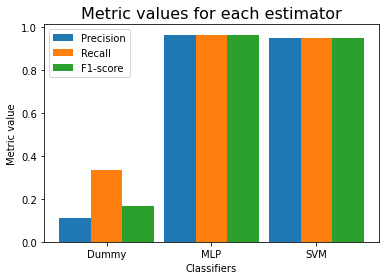

In [ ]:
X = ['Dummy','MLP','SVM']
Yprecision = [np.mean(dummy_precision),np.mean(mlp_precision),np.mean(svm_precision)]
Yrecall = [np.mean(dummy_recall),np.mean(mlp_recall),np.mean(svm_recall)]
Yf1score = [np.mean(dummy_f1),np.mean(mlp_f1),np.mean(svm_f1)]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.3, Yprecision, 0.3, label = 'Precision')
plt.bar(X_axis , Yrecall, 0.3, label = 'Recall')
plt.bar(X_axis + 0.3, Yf1score, 0.3, label = 'F1-score')

plt.xticks(X_axis, X)
plt.xlabel("Classifiers")
plt.ylabel("Metric value")
plt.title("Metric values for each estimator", fontsize=16)
plt.legend()
plt.show()

#####Undersampling

Στη συνέχεια, δοκιμάζουμε να εξισορροπήσουμε με τη μέθοδο Undersampling. Με τη μέθοδο Uversampling, εξισορροπούμε το dataset εξισώνοντας τον αριθμό δειγμάτων σε κάθε κατηγορία με το αριθμό δειγμάτων που είχε η κατηγορία με τα λιγότερα δείγματα. Στην δική μας περίπτωση, βλέπουμε ότι η κλάση 1 έχει τα λιγότερα δείγματα, οπότε στο τέλος της εξισορρόπησης και οι 3 κλάσεις θα έχουν τον ίδιο αριθμό δειγμάτων με αυτήν.

In [ ]:
#initialize UnderSampler
ros = RandomUnderSampler(sampling_strategy='auto')   # perform undersampling for all classes except minority
train_resampled, train_labels_resampled = ros.fit_resample(train_scaled, train_labels)  # transform data
print(train_resampled.shape)
print(train_labels_resampled.shape)
print(train_labels_resampled)

(22356, 15)
(22356,)
[0 0 0 ... 2 2 2]


In [ ]:
print((train_labels_resampled==0).sum())
print((train_labels_resampled==1).sum())
print((train_labels_resampled==2).sum())

7452
7452
7452


Ελέγχουμε τα αποτελέσματα των εκτιμητών μας στα νέα δεδομένα:

In [ ]:
folds=5

dummy_clf = DummyClassifier()                          # initialize dummy classifier
dummy_precision=cross_val_score(dummy_clf,train_resampled,train_labels_resampled,cv=folds,scoring='precision_weighted')   # calculate precision with cross validation
dummy_recall=cross_val_score(dummy_clf,train_resampled,train_labels_resampled,cv=folds,scoring='recall_weighted')         # calculate recall with cross validation
dummy_f1=cross_val_score(dummy_clf,train_resampled,train_labels_resampled,cv=folds,scoring='f1_weighted')                 # calculate F1-score with cross validation

mlp_clf = MLPClassifier()                            # initialize MLP classifier
mlp_precision=cross_val_score(mlp_clf,train_resampled,train_labels_resampled,cv=folds,scoring='precision_weighted')
mlp_recall=cross_val_score(mlp_clf,train_resampled,train_labels_resampled,cv=folds,scoring='recall_weighted')
mlp_f1=cross_val_score(mlp_clf,train_resampled,train_labels_resampled,cv=folds,scoring='f1_weighted')

svm_clf = SVC()                                      # initialize SVM classifier
svm_precision=cross_val_score(svm_clf,train_resampled,train_labels_resampled,cv=folds,scoring='precision_weighted')
svm_recall=cross_val_score(svm_clf,train_resampled,train_labels_resampled,cv=folds,scoring='recall_weighted')
svm_f1=cross_val_score(svm_clf,train_resampled,train_labels_resampled,cv=folds,scoring='f1_weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Pr

Παρουσιάζουμε τις επιδόσεις των εκτιμητών σε πίνακα και σε bar plot:

In [ ]:
# print in table:
t = Texttable()
columns = [['Classifier','Weighted Precision', 'Weighted Recall', 'Weighted F1-score']]
rows = ["Dummy","MLP","SVM"]
columns.append([rows[0],np.mean(dummy_precision),np.mean(dummy_recall),np.mean(dummy_f1)])
columns.append([rows[1],np.mean(mlp_precision),np.mean(mlp_recall),np.mean(mlp_f1)])
columns.append([rows[2],np.mean(svm_precision),np.mean(svm_recall),np.mean(svm_f1)])
t.add_rows(columns)
print(t.draw())

+------------+--------------------+-----------------+-------------------+
| Classifier | Weighted Precision | Weighted Recall | Weighted F1-score |
+============+====================+=================+===================+
| Dummy      | 0.111              | 0.333           | 0.167             |
+------------+--------------------+-----------------+-------------------+
| MLP        | 0.948              | 0.948           | 0.948             |
+------------+--------------------+-----------------+-------------------+
| SVM        | 0.927              | 0.926           | 0.926             |
+------------+--------------------+-----------------+-------------------+


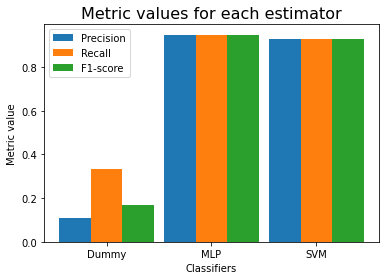

In [ ]:
X = ['Dummy','MLP','SVM']
Yprecision = [np.mean(dummy_precision),np.mean(mlp_precision),np.mean(svm_precision)]
Yrecall = [np.mean(dummy_recall),np.mean(mlp_recall),np.mean(svm_recall)]
Yf1score = [np.mean(dummy_f1),np.mean(mlp_f1),np.mean(svm_f1)]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.3, Yprecision, 0.3, label = 'Precision')
plt.bar(X_axis , Yrecall, 0.3, label = 'Recall')
plt.bar(X_axis + 0.3, Yf1score, 0.3, label = 'F1-score')

plt.xticks(X_axis, X)
plt.xlabel("Classifiers")
plt.ylabel("Metric value")
plt.title("Metric values for each estimator", fontsize=16)
plt.legend()
plt.show()

In [ ]:
dummy_clf = DummyClassifier()                          # initialize dummy classifier
dummy_model = dummy_clf.fit(train_resampled, train_labels_resampled)       # fit classifier
dummy_preds= dummy_model.predict(test_scaled)

mlp_clf = MLPClassifier()                            # initialize MLP classifier
mlp_model = mlp_clf.fit(train_resampled, train_labels_resampled)         # fit classifier
mlp_preds= mlp_model.predict(test_scaled)

svm_clf = SVC()                                      # initialize SVM classifier
svm_model = svm_clf.fit(train_resampled, train_labels_resampled)         # fit classifier
svm_preds= svm_model.predict(test_scaled)

dummy_metrics=precision_recall_fscore_support(test_labels, dummy_preds, average=None)  # get precision, recall, F-1 score and support for estimator
mlp_metrics=precision_recall_fscore_support(test_labels, mlp_preds, average=None)
svm_metrics=precision_recall_fscore_support(test_labels, svm_preds, average=None)
dummy_mean_metrics=precision_recall_fscore_support(test_labels, dummy_preds, average='weighted')  # get weighted (average) precision, recall, F-1 score and support for estimator
mlp_mean_metrics=precision_recall_fscore_support(test_labels, mlp_preds, average='weighted')
svm_mean_metrics=precision_recall_fscore_support(test_labels, svm_preds, average='weighted')

#####Σχολιασμός

Παρατηρούμε ότι με χρήση oversampling έχουμε επιδόσεις αντίστοιχες με τις επιδόσεις στο imbalanced dataset, ενώ με undersampling οι επιδόσεις είναι πολύ ελαφρά χαμηλότερες (2% περίπου πιο χαμηλές). Επιλέγουμε να χρησιμοποιήσουμε εξισορρόπηση του dataset με χρήση oversampling για τον εξής λόγο: Είναι γενικά σκόπιμο το dataset μας να είναι ισορροπημένο, καθώς έτσι αποφεύγουμε την δημιουργία μοντέλων biased ως προς την επιλογή της majority κατηγορίας. Όμως, αν χρησιμοποιήσουμε υποδειγματοληψία, χάνουμε ένα μεγάλο αριθμό δειγμάτων από τις κλάσεις που διαθέτουν περισσότερα δείγματα. Η απώλεια δεδομένων δεν είναι γενικά επιθυμητή, καθώς μειώνει την ικανότητα τον μοντέλων μας να γενικεύουν. Έτσι, επιλέγουμε τελικά το oversampling για την εξισορρόπηση των δεδομένων μας.

####PCA

Ένας μετασχηματισμός ο οποίος μπορεί να βελτιώσει συχνά τις επιδόσεις των εκτιμητών μας είναι η ανάλυση PCA. H μέθοδος αυτή επιτυγχάνει μείωση της διαστατικότητας των δεδομένων μας, διατηρώντας παράλληλα όσο το δυνατόν μεγαλύτερο ποσοστό της πληροφορίας των αρχικών δεδομένων. Η μείωση της διαστατικότητας μπορεί να χρήσιμη, καθώς επιτρέπει την ευκολότερη εκπαίδευση των εκτιμητών και μειώνει το overfitting.

#####14 PCA components

Αρχικά, εκτελούμε PCA με στόχο την μείωση της διάστασης από 15 σε 16:

In [ ]:
n = 14
pca_1 = PCA(n_components = n)

trainPCA_1 = pca_1.fit_transform(train_resampled)   # perform PCA on train data
testPCA_1 = pca_1.transform(test_scaled)            # perform PCA on test data

print(train_resampled.shape)
print(trainPCA_1.shape)
print("")
print(test_scaled.shape)
print(testPCA_1.shape)

(107793, 15)
(107793, 14)

(30000, 15)
(30000, 14)


Εξετάζουμε τις επιδόσεις των εκτιμητών:

In [ ]:
folds=5

dummy_clf = DummyClassifier()                          # initialize dummy classifier
dummy_precision=cross_val_score(dummy_clf,trainPCA_1,train_labels_resampled,cv=folds,scoring='precision_weighted')   # calculate precision with cross validation
dummy_recall=cross_val_score(dummy_clf,trainPCA_1,train_labels_resampled,cv=folds,scoring='recall_weighted')         # calculate recall with cross validation
dummy_f1=cross_val_score(dummy_clf,trainPCA_1,train_labels_resampled,cv=folds,scoring='f1_weighted')                 # calculate F1-score (weighted) with cross validation

mlp_clf = MLPClassifier()                            # initialize MLP classifier
mlp_precision=cross_val_score(mlp_clf,trainPCA_1,train_labels_resampled,cv=folds,scoring='precision_weighted')
mlp_recall=cross_val_score(mlp_clf,trainPCA_1,train_labels_resampled,cv=folds,scoring='recall_weighted')
mlp_f1=cross_val_score(mlp_clf,trainPCA_1,train_labels_resampled,cv=folds,scoring='f1_weighted')

svm_clf = SVC()                                      # initialize SVM classifier
svm_precision=cross_val_score(svm_clf,trainPCA_1,train_labels_resampled,cv=folds,scoring='precision_weighted')
svm_recall=cross_val_score(svm_clf,trainPCA_1,train_labels_resampled,cv=folds,scoring='recall_weighted')
svm_f1=cross_val_score(svm_clf,trainPCA_1,train_labels_resampled,cv=folds,scoring='f1_weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Pr

Παρουσιάζουμε τις επιδόσεις σε πίνακα και σε bar plot:

In [ ]:
# print in table:
t = Texttable()
columns = [['Classifier','Weighted Precision', 'Weighted Recall', 'Weighted F1-score']]
rows = ["Dummy","MLP","SVM"]
columns.append([rows[0],np.mean(dummy_precision),np.mean(dummy_recall),np.mean(dummy_f1)])
columns.append([rows[1],np.mean(mlp_precision),np.mean(mlp_recall),np.mean(mlp_f1)])
columns.append([rows[2],np.mean(svm_precision),np.mean(svm_recall),np.mean(svm_f1)])
t.add_rows(columns)
print(t.draw())

+------------+--------------------+-----------------+-------------------+
| Classifier | Weighted Precision | Weighted Recall | Weighted F1-score |
+============+====================+=================+===================+
| Dummy      | 0.111              | 0.333           | 0.167             |
+------------+--------------------+-----------------+-------------------+
| MLP        | 0.968              | 0.967           | 0.967             |
+------------+--------------------+-----------------+-------------------+
| SVM        | 0.948              | 0.948           | 0.948             |
+------------+--------------------+-----------------+-------------------+


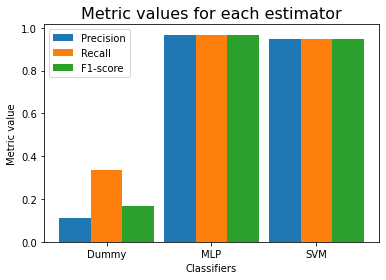

In [ ]:
X = ['Dummy','MLP','SVM']
Yprecision = [np.mean(dummy_precision),np.mean(mlp_precision),np.mean(svm_precision)]
Yrecall = [np.mean(dummy_recall),np.mean(mlp_recall),np.mean(svm_recall)]
Yf1score = [np.mean(dummy_f1),np.mean(mlp_f1),np.mean(svm_f1)]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.3, Yprecision, 0.3, label = 'Precision')
plt.bar(X_axis , Yrecall, 0.3, label = 'Recall')
plt.bar(X_axis + 0.3, Yf1score, 0.3, label = 'F1-score')

plt.xticks(X_axis, X)
plt.xlabel("Classifiers")
plt.ylabel("Metric value")
plt.title("Metric values for each estimator", fontsize=16)
plt.legend()
plt.show()

Στην συνέχεια παρουσιάζουμε σε ένα διάγραμμα το ποσοστό πληροφορίας που περιέχεται αν διατηρήσουμε συγκεκριμένο αριθμό από τις συνιστώσες PCA:

[0.3511762  0.58441124 0.67825005 0.75213856 0.81687518 0.87465973
 0.92142587 0.96429895 0.99325028 0.99636038 0.99825604 0.99927267
 1.         1.        ]


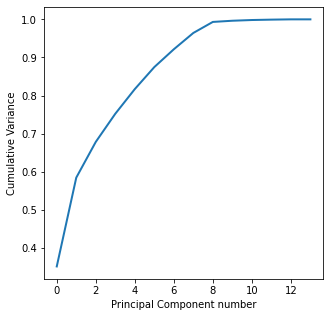

In [ ]:
evar_1 = pca_1.explained_variance_ratio_
cum_evar_1 = np.cumsum(evar_1)
print(cum_evar_1)
plt.figure(1, figsize=(5,5))
plt.xlabel("Principal Component number")
plt.ylabel("Cumulative Variance")
plt.plot(cum_evar_1, linewidth=2)
plt.show()

Παρατηρούμε ότι κρατώντας από 9 και πάνω συνιστώσες διατηρείται σχεδόν όλη η αρχική πληροφορία (πάνω από 99%). Επομένως, δοκιμάζουμε να μειώσουμε την διάσταση των δεδομένων μας περαιτέρω και εξετάζουμε τις επιδόσεις των εκτιμητών για δεδομένα χαμηλότερης διάστασης:

#####12 PCA components

Δοκιμάζουμε να μειώσουμε την διάσταση των δεδομένων από 15 σε 12:

In [ ]:
from sklearn.decomposition import PCA

n = 12
pca_1 = PCA(n_components = n)

trainPCA_1 = pca_1.fit_transform(train_resampled)
testPCA_1 = pca_1.transform(test_scaled)

print(train_resampled.shape)
print(trainPCA_1.shape)
print("")
print(test_scaled.shape)
print(testPCA_1.shape)

(107793, 15)
(107793, 12)

(30000, 15)
(30000, 12)


In [ ]:
folds=5

dummy_clf = DummyClassifier()                          # initialize dummy classifier
dummy_precision=cross_val_score(dummy_clf,trainPCA_1,train_labels_resampled,cv=folds,scoring='precision_weighted')   # calculate precision with cross validation
dummy_recall=cross_val_score(dummy_clf,trainPCA_1,train_labels_resampled,cv=folds,scoring='recall_weighted')         # calculate recall with cross validation
dummy_f1=cross_val_score(dummy_clf,trainPCA_1,train_labels_resampled,cv=folds,scoring='f1_weighted')                 # calculate F1-score (weighted) with cross validation

mlp_clf = MLPClassifier()                            # initialize MLP classifier
mlp_precision=cross_val_score(mlp_clf,trainPCA_1,train_labels_resampled,cv=folds,scoring='precision_weighted')
mlp_recall=cross_val_score(mlp_clf,trainPCA_1,train_labels_resampled,cv=folds,scoring='recall_weighted')
mlp_f1=cross_val_score(mlp_clf,trainPCA_1,train_labels_resampled,cv=folds,scoring='f1_weighted')

svm_clf = SVC()                                      # initialize SVM classifier
svm_precision=cross_val_score(svm_clf,trainPCA_1,train_labels_resampled,cv=folds,scoring='precision_weighted')
svm_recall=cross_val_score(svm_clf,trainPCA_1,train_labels_resampled,cv=folds,scoring='recall_weighted')
svm_f1=cross_val_score(svm_clf,trainPCA_1,train_labels_resampled,cv=folds,scoring='f1_weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Pr

In [ ]:
# print in table:
t = Texttable()
columns = [['Classifier','Weighted Precision', 'Weighted Recall', 'Weighted F1-score']]
rows = ["Dummy","MLP","SVM"]
columns.append([rows[0],np.mean(dummy_precision),np.mean(dummy_recall),np.mean(dummy_f1)])
columns.append([rows[1],np.mean(mlp_precision),np.mean(mlp_recall),np.mean(mlp_f1)])
columns.append([rows[2],np.mean(svm_precision),np.mean(svm_recall),np.mean(svm_f1)])
t.add_rows(columns)
print(t.draw())

+------------+--------------------+-----------------+-------------------+
| Classifier | Weighted Precision | Weighted Recall | Weighted F1-score |
+============+====================+=================+===================+
| Dummy      | 0.111              | 0.333           | 0.167             |
+------------+--------------------+-----------------+-------------------+
| MLP        | 0.961              | 0.961           | 0.960             |
+------------+--------------------+-----------------+-------------------+
| SVM        | 0.944              | 0.944           | 0.944             |
+------------+--------------------+-----------------+-------------------+


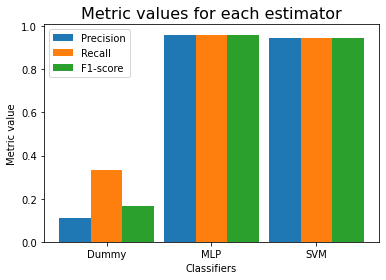

In [ ]:
X = ['Dummy','MLP','SVM']
Yprecision = [np.mean(dummy_precision),np.mean(mlp_precision),np.mean(svm_precision)]
Yrecall = [np.mean(dummy_recall),np.mean(mlp_recall),np.mean(svm_recall)]
Yf1score = [np.mean(dummy_f1),np.mean(mlp_f1),np.mean(svm_f1)]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.3, Yprecision, 0.3, label = 'Precision')
plt.bar(X_axis , Yrecall, 0.3, label = 'Recall')
plt.bar(X_axis + 0.3, Yf1score, 0.3, label = 'F1-score')

plt.xticks(X_axis, X)
plt.xlabel("Classifiers")
plt.ylabel("Metric value")
plt.title("Metric values for each estimator", fontsize=16)
plt.legend()
plt.show()

[0.3511762  0.58441124 0.67825005 0.75213856 0.81687518 0.87465973
 0.92142587 0.96429895 0.99325028 0.99636038 0.99825604 0.99927267]


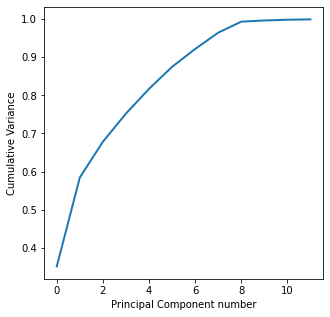

In [ ]:
evar_1 = pca_1.explained_variance_ratio_
cum_evar_1 = np.cumsum(evar_1)
print(cum_evar_1)
plt.figure(1, figsize=(5,5))
plt.xlabel("Principal Component number")
plt.ylabel("Cumulative Variance")
plt.plot(cum_evar_1, linewidth=2)
plt.show()

#####9 PCA components

Μειώνουμε την διάσταση των δεδομένων από 15 σε 9:

In [ ]:
n = 9
pca_2 = PCA(n_components = n)

trainPCA_2 = pca_2.fit_transform(train_resampled)  # transform train data
testPCA_2 = pca_2.transform(test_scaled)           # transform test data

print(train_resampled.shape)
print(trainPCA_2.shape)
print("")
print(test_scaled.shape)
print(testPCA_2.shape)

(107793, 15)
(107793, 9)

(30000, 15)
(30000, 9)


Εξετάζουμε τις επιδόσεις των εκτιμητών με τα νέα δεδομένα:

In [ ]:
folds=5

dummy_clf = DummyClassifier()                          # initialize dummy classifier
dummy_precision=cross_val_score(dummy_clf,trainPCA_2,train_labels_resampled,cv=folds,scoring='precision_weighted')   # calculate precision with cross validation
dummy_recall=cross_val_score(dummy_clf,trainPCA_2,train_labels_resampled,cv=folds,scoring='recall_weighted')         # calculate recall with cross validation
dummy_f1=cross_val_score(dummy_clf,trainPCA_2,train_labels_resampled,cv=folds,scoring='f1_weighted')                 # calculate F1-score with cross validation

mlp_clf = MLPClassifier()                            # initialize MLP classifier
mlp_precision=cross_val_score(mlp_clf,trainPCA_2,train_labels_resampled,cv=folds,scoring='precision_weighted')
mlp_recall=cross_val_score(mlp_clf,trainPCA_2,train_labels_resampled,cv=folds,scoring='recall_weighted')
mlp_f1=cross_val_score(mlp_clf,trainPCA_2,train_labels_resampled,cv=folds,scoring='f1_weighted')

svm_clf = SVC()                                      # initialize SVM classifier
svm_precision=cross_val_score(svm_clf,trainPCA_2,train_labels_resampled,cv=folds,scoring='precision_weighted')
svm_recall=cross_val_score(svm_clf,trainPCA_2,train_labels_resampled,cv=folds,scoring='recall_weighted')
svm_f1=cross_val_score(svm_clf,trainPCA_2,train_labels_resampled,cv=folds,scoring='f1_weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/pytho

Παρουσιάζουμε τις επιδόσεις των εκτιμητών σε πίνακα και σε bar plot:

In [ ]:
# print in table:
t = Texttable()
columns = [['Classifier','Weighted Precision', 'Weighted Recall', 'Weighted F1-score ']]
rows = ["Dummy","MLP","SVM"]
columns.append([rows[0],np.mean(dummy_precision),np.mean(dummy_recall),np.mean(dummy_f1)])
columns.append([rows[1],np.mean(mlp_precision),np.mean(mlp_recall),np.mean(mlp_f1)])
columns.append([rows[2],np.mean(svm_precision),np.mean(svm_recall),np.mean(svm_f1)])
t.add_rows(columns)
print(t.draw())

+------------+--------------------+-----------------+--------------------+
| Classifier | Weighted Precision | Weighted Recall | Weighted F1-score  |
+============+====================+=================+====================+
| Dummy      | 0.111              | 0.333           | 0.167              |
+------------+--------------------+-----------------+--------------------+
| MLP        | 0.903              | 0.902           | 0.902              |
+------------+--------------------+-----------------+--------------------+
| SVM        | 0.885              | 0.884           | 0.883              |
+------------+--------------------+-----------------+--------------------+


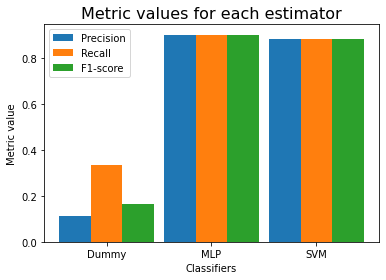

In [ ]:
X = ['Dummy','MLP','SVM']
Yprecision = [np.mean(dummy_precision),np.mean(mlp_precision),np.mean(svm_precision)]
Yrecall = [np.mean(dummy_recall),np.mean(mlp_recall),np.mean(svm_recall)]
Yf1score = [np.mean(dummy_f1),np.mean(mlp_f1),np.mean(svm_f1)]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.3, Yprecision, 0.3, label = 'Precision')
plt.bar(X_axis , Yrecall, 0.3, label = 'Recall')
plt.bar(X_axis + 0.3, Yf1score, 0.3, label = 'F1-score')

plt.xticks(X_axis, X)
plt.xlabel("Classifiers")
plt.ylabel("Metric value")
plt.title("Metric values for each estimator", fontsize=16)
plt.legend()
plt.show()

#####Σχολιασμός

Παρατηρούμε ότι με χρήση 14 και 12 PCA components οι επιδόσεις είναι περίπου ίδιες με αυτές χωρίς την χρήση της μεθόδου PCA, με μια πολύ μικρή βελτίωση να παρουσιάζεται στην περίπτωση της χρήσης 14 PCA components. Αντίθετα, στην περίπτωση  που επιλέγουμε 9 PCA components υπάρχει μία μικρή πτώση στην επίδοση των εκτιμητών, γεγονός που οφείλεται στο ότι η μείωση διαστατικότητας συνεπάγεται αναπόφευκτα μία απώλεια πληροφορίας, ακόμα και μικρή. Αξίζει πάντως να παρατηρήσουμε, πως αν και η επίδοση των εκτιμητών μειώνεται λίγο για 9 PCA components εξακολουθεί να είναι πολύ υψηλή, παρά την σημαντική μείωση των χαρκτηριστικών, γεγονός που αναδικνύει την αποτελεσματικότητα της μεθόδου PCA για την μείωση των διαστάσεων με όσο το δυνατόν λιγότερη απώλεια πληροφορίας.

Τελικά, επιλέγουμε να συνεχίσουμε την προεπεξεργασία κρατώντας 14 PCA components, αφού σε την επιλογή αυτή οι εκτιμητές μας έχουν την βέλτιστη επίδοση, στο cross-validation.

###Pipeline

Στη συνέχεια, μελετήθηκε η αρχιτεκτονική Pipeline. H χρήση Pipelines έχει ως στόχο την διευκόλυνση της διαχείρισης των δεδομένων μας, ορίζοντας ένα σύνολο από μετασχηματισμούς πάνω στα αρχικά δεδομένα πριν την εισαγωγή τους στον εκτιμητή.

Αφού είχαν προηγηθεί τα βήματα της προεπεξεργασίας και είχε ήδη γίνει επιλογή μετασχηματιστών επιλέξαμε να δουλέψουμε top-down, πειραματιζόμενοι με τα στάδια και τους μετασχηματισμούς. Εν τέλει, προέκυψε ότι η καλύτερη επίδοση προέκυπτε από τον συνδυασμό όλων των σταδίων, γεγονός το οποίο συμφωνούσε και με τα αποτελέσματα που είχαν προκύψει από την προεπεξεργασία.

In [ ]:
from imblearn.pipeline import Pipeline

mlp_clf_pl = MLPClassifier()
svm_clf_pl = SVC()
dummy_clf_pl = DummyClassifier()

dummy_pipe = Pipeline(steps=[('selector',selector), ('scaler', scaler), ('sampler', ros), ('pca', pca_1),('dummy', dummy_clf_pl)])
mlp_pipe = Pipeline(steps=[('selector',selector), ('scaler', scaler), ('sampler', ros), ('pca', pca_1),('mlp', mlp_clf_pl)])
svm_pipe = Pipeline(steps=[('selector',selector), ('scaler', scaler), ('sampler', ros), ('pca', pca_1),('svm', svm_clf_pl)])

In [ ]:
folds=5

dummy_precision=cross_val_score(dummy_pipe,train,train_labels,cv=folds,scoring='precision_weighted')   # calculate precision with cross validation
dummy_recall=cross_val_score(dummy_pipe,train,train_labels,cv=folds,scoring='recall_weighted')         # calculate recall with cross validation
dummy_f1=cross_val_score(dummy_pipe,train,train_labels,cv=folds,scoring='f1_weighted')                 # calculate F1-score (macro) with cross validation

mlp_precision=cross_val_score(mlp_pipe,train,train_labels,cv=folds,scoring='precision_weighted')
mlp_recall=cross_val_score(mlp_pipe,train,train_labels,cv=folds,scoring='recall_weighted')
mlp_f1=cross_val_score(mlp_pipe,train,train_labels,cv=folds,scoring='f1_weighted')

svm_precision=cross_val_score(svm_pipe,train,train_labels,cv=folds,scoring='precision_weighted')
svm_recall=cross_val_score(svm_pipe,train,train_labels,cv=folds,scoring='recall_weighted')
svm_f1=cross_val_score(svm_pipe,train,train_labels,cv=folds,scoring='f1_weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/pytho

In [ ]:
# print in table:
t = Texttable()
columns = [['Classifier','Weighted Precision', 'Weighted Recall', 'Weighted F1-score']]
rows = ["Dummy","MLP","SVM"]
columns.append([rows[0],np.mean(dummy_precision),np.mean(dummy_recall),np.mean(dummy_f1)])
columns.append([rows[1],np.mean(mlp_precision),np.mean(mlp_recall),np.mean(mlp_f1)])
columns.append([rows[2],np.mean(svm_precision),np.mean(svm_recall),np.mean(svm_f1)])
t.add_rows(columns)
print(t.draw())


+------------+--------------------+-----------------+-------------------+
| Classifier | Weighted Precision | Weighted Recall | Weighted F1-score |
+============+====================+=================+===================+
| Dummy      | 0.263              | 0.513           | 0.348             |
+------------+--------------------+-----------------+-------------------+
| MLP        | 0.965              | 0.964           | 0.965             |
+------------+--------------------+-----------------+-------------------+
| SVM        | 0.947              | 0.946           | 0.947             |
+------------+--------------------+-----------------+-------------------+


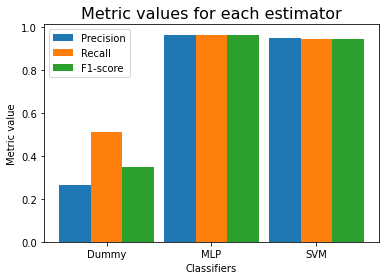

In [ ]:
X = ['Dummy','MLP','SVM']
Yprecision = [np.mean(dummy_precision),np.mean(mlp_precision),np.mean(svm_precision)]
Yrecall = [np.mean(dummy_recall),np.mean(mlp_recall),np.mean(svm_recall)]
Yf1score = [np.mean(dummy_f1),np.mean(mlp_f1),np.mean(svm_f1)]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.3, Yprecision, 0.3, label = 'Precision')
plt.bar(X_axis , Yrecall, 0.3, label = 'Recall')
plt.bar(X_axis + 0.3, Yf1score, 0.3, label = 'F1-score')

plt.xticks(X_axis, X)
plt.xlabel("Classifiers")
plt.ylabel("Metric value")
plt.title("Metric values for each estimator", fontsize=16)
plt.legend()
plt.show()

###Hyperparameter Optimization - Optuna


Οι ταξινομητές με του οποίους δουλεύουμε έχουν κάποιες υπερπαραμέτρους, δηλαδή κάποιες  μεταβλητές των οποίων οι τιμές χρησιμοποιούνται για να ελέγξουμε περαιτέρω τη διαδικασία της μάθησης. Έως τώρα οι ταξινομητές οι οποίοι χρησιμοποιήθηκαν χρησιμοποιούσαν τις default τιμές για τις υπερπαραμέτρους τους, όμως η εκτεταμένη αναζήτηση των διαφόρων τιμών που μπορούν να πάρουν οι υπερπαράμετροι, μπορεί να μας δώσει συνδυασμούς οι οποίοι προσφέρουν καλύτερα αποτελέσματα. Για το σκοπό αυτό, έχουν αναπτυχθεί διάφορες βιβλιοθήκες, όπως είναι η βιβλιοθήκη Optuna την οποία χρησιμοποιούμε παρακάτω.

####SVM Hyperparameter optimization

In [ ]:
!pip install optuna

Προκειμένου να γίνει μια αναζήτηση στο χώρο των υπερπαραμέτρων με τη χρήση του Optuna, ορίζεται μια συνάρτηση Objective. Εντός αυτής, ορίζονται οι διάφορες υπερπαράμετροι που θα δοκιμάσουμε καθώς και κάποια όρια στις τιμές τους. Για τον ταξινομητή SVM αναζητήθηκαν διαφορετικοί συνδυασμοί των παρακάτω υπερπαραμέτρων :


*   C  
*   kernel
*   degree
*   gamma

Για τις παραπάνω μεταβλητές μπορούν να προταθούν διάφορα πεδία τιμών και σε κάθε επανάληψη γίνεται η αξιολόγηση ενός διαφορετικού συνδυασμού. Αρχικά έγιναν δοκιμές με τις εξής τιμές ανά παράμετρο:


*   C : [1e-10, 10]
*   kernel : ['linear', 'rbf', 'poly', 'sigmoid']
*   degree : [1,50]
*   gamma : [0.001, 10000]

Έπειτα από μερικές πρώτες δοκιμές και παρατηρήσεις έγιναν αλλαγές προκείμενου να μειωθεί το εύρος τιμών με στόχο την πιο μεθοδευμένη αναζήτηση. Συγκεκριμένα, παρατηρήθηκε ότι στις δοκιμές με τα καλύτερα αποτελέσματα η τιμή της υπερπαραμέτρου C δεν είχε τιμή μεγαλύτερη του 1, ο πυρήνας ήταν είτε rbf είτε linear (ενώ επίσης αυτές οι δοκιμές ήταν σημαντικά γρηγορότερες, ειδικά συγκριτικά με τις δοκιμές με πυρήνα poly), ενώ η τιμή της υπερπαραμέτρου gamma ήταν μικρότερη του 10. Έτσι έγιναν οι εξής αλλαγές:

*   C : [1e-10, 1]
*   kernel : ['linear', 'rbf']
*   degree : [1,50]
*   gamma : [0.001, 10]

Στη συνέχεια, τρέξαμε περαιτέρω δοκιμές με τις παραπάνω τιμές.

Μέσα στην Objective, γίνεται fit και predict, και υπολογίζεται το μέσο τετραγωνικό σφάλμα, το οποίο και επιστρέφει η συνάρτηση.

Καθώς η διαδικασία του fit, ειδικότερα, είναι πολύ χρονοβόρα επιλέξαμε να δουλέψουμε σε ένα υποσύνολο του training σετ που είχαμε ορίσει. Έτσι, χρησιμοποιήσαμε την StratifiedShuffleSplit για να χωρίσουμε το training σετ και κρατήσαμε ένα σύνολο μεγέθους 35000 δειγμάτων (από 70000 που ήταν το αρχικό) και στη συνέχεια με τη χρήση του train_test_split το χωρίσαμε περαιτέρω σε ένα σύνολο train για το fit και ένα σύνολο test για την τελική αξιολόγηση και τον υπολογισμό του μέσου τετραγωνικού σφάλματος.



In [ ]:
#svm hyperparameter optimization

def objective(trial):

  C = trial.suggest_loguniform('C', 1e-10, 1)
  kernel = trial.suggest_categorical('kernel',['rbf','linear'])
  degree = trial.suggest_int('degree', 1, 50)
  gamma = trial.suggest_loguniform('gamma', 0.001, 1)

  #Construct the model
  clf = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma)
  svm_pipe = Pipeline(steps=[('selector',selector), ('scaler', scaler), ('sampler', ros), ('pca', pca_1),('svm', clf)])

  sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5)

  for train_index, test_index in sss.split(train, train_labels):
    X_train, X_test = train[train_index], train[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]

  train_s, test_s, train_labels_s, test_labels_s = train_test_split(X_train, y_train, test_size=0.30)
  svm_pipe.fit(train_s, train_labels_s)

  #Evaluate model
  preds = svm_pipe.predict(test_s)
  loss = mean_squared_error(test_labels_s, preds)

  return loss

Για να γίνουν οι δοκιμές, δημιουργούμε ένα αντικείμενο study, για το οποίο ανάλογα με το τι επιστρέφει η συνάρτηση Objective ορίζουμε μια κατεύθυνση (direction) για το optimization. Στην περιπτωσή μας, η συνάρτηση objective επιστρέφει το μέσο τετραγωνικό σφάλμα, loss, το οποίο θέλουμε να ελαχιστοποιήσουμε, οπότε χρησιμοποιήσαμε το direction minimize.

Έπειτα, ξεκινάμε την αναζήτηση και ορίζουμε τον αριθμό των δοκιμών που θέλουμε να γίνουν, σε αυτήν την περίπτωση 100.

In [ ]:
import optuna

study = optuna.create_study(direction='minimize')

study.optimize(objective, n_trials=100)

[I 2021-12-02 14:52:25,122] A new study created in memory with name: no-name-488bc691-1607-4d14-84b4-2ac1befd266e
[I 2021-12-02 14:53:57,946] Trial 0 finished with value: 1.0287619047619048 and parameters: {'C': 4.352143216033679e-08, 'kernel': 'linear', 'degree': 50, 'gamma': 0.02720845172161342}. Best is trial 0 with value: 1.0287619047619048.
[I 2021-12-02 14:56:48,488] Trial 1 finished with value: 0.9855238095238095 and parameters: {'C': 1.818919517552971e-08, 'kernel': 'rbf', 'degree': 42, 'gamma': 0.03463904441290427}. Best is trial 1 with value: 0.9855238095238095.
[I 2021-12-02 14:59:37,724] Trial 2 finished with value: 1.9183809523809523 and parameters: {'C': 0.002666441915809541, 'kernel': 'rbf', 'degree': 5, 'gamma': 0.9560383506993149}. Best is trial 1 with value: 0.9855238095238095.
[I 2021-12-02 15:00:21,279] Trial 3 finished with value: 0.6104761904761905 and parameters: {'C': 0.0008794858223481955, 'kernel': 'linear', 'degree': 14, 'gamma': 0.00893637702478791}. Best is

Αφού τρέξουν οι δοκιμές μπορούμε να δούμε ποια δοκιμή έδωσε το καλύτερο αποτέλεσμα και με ορίζουμε έναν ταξινομητή με τις υπερπαραμέτρους που προέκυψαν από αυτή και ελέγχουμε τις επιδόσεις που αυτός προσφέρει με τη χρήση cross validation, όπως και στα παραπάνω ερωτήματα.

In [ ]:
folds=5
svm_clf_pl = SVC(C=0.9680545403030303, kernel='rbf',degree=26,gamma=0.061605400671852634)
svm_pipe = Pipeline(steps=[('selector',selector), ('scaler', scaler), ('sampler', ros), ('pca', pca_1),('svm', svm_clf_pl)])
svm_precision=cross_val_score(svm_pipe,train,train_labels,cv=folds,scoring='precision_weighted')
svm_recall=cross_val_score(svm_pipe,train,train_labels,cv=folds,scoring='recall_weighted')
svm_f1=cross_val_score(svm_pipe,train,train_labels,cv=folds,scoring='f1_weighted')

Παρακάτω παρουσιάζονται τα αποτελέσματα της αξιολόγησης, τα οποία είναι παρόμοια με τις βέλτιστες επιδόσεις που είχαμε δει και σε προηγούμενα ερωτήματα. Αυτό οφείλεται στο γεγονός ότι δουλεύουμε σε ένα περιορισμένο πλαίσιο, δηλαδή εξερευνούμε τις βασικότερες υπερπαραμέτρους και αυτές σε περιορισμένο αριθμό επαναλήψεων (100). Μια πιο εκτεταμένη αναζήτηση, τόσο όσον αφορά τα όρια των παραμέτρων αλλά και τις επαναλήψεις που γίνονται θα μπορούσε να προσφέρει και άλλα ενδιαφέροντα συμπεράσματα.

In [ ]:
# print in table:
t = Texttable()
columns = [['Classifier','Weighted Precision', 'Weighted Recall', 'Weighted F1-score']]
rows = ["SVM"]
columns.append([rows[0],np.mean(svm_precision),np.mean(svm_recall),np.mean(svm_f1)])
t.add_rows(columns)
print(t.draw())

+------------+--------------------+-----------------+-------------------+
| Classifier | Weighted Precision | Weighted Recall | Weighted F1-score |
+============+====================+=================+===================+
| SVM        | 0.947              | 0.946           | 0.946             |
+------------+--------------------+-----------------+-------------------+


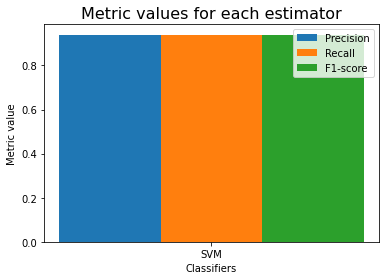

In [ ]:
X = ['SVM']
Yprecision = [np.mean(svm_precision)]
Yrecall = [np.mean(svm_recall)]
Yf1score = [np.mean(svm_f1)]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.3, Yprecision, 0.3, label = 'Precision')
plt.bar(X_axis , Yrecall, 0.3, label = 'Recall')
plt.bar(X_axis + 0.3, Yf1score, 0.3, label = 'F1-score')

plt.xticks(X_axis, X)
plt.xlabel("Classifiers")
plt.ylabel("Metric value")
plt.title("Metric values for each estimator", fontsize=16)
plt.legend()
plt.show()

#####Επιπρόσθετες δοκιμές

Σε αναζήτηση πιο ικανοποιητικών αποτελεσμάτων και βελτιστοποιήσεων πραγματοποιήθηκαν και άλλες αναζητήσεις τα αποτελέσματα των οποίων παρατίθενται παρακάτω. Συγκεκριμένα, χρησιμοποιήθηκαν samplers, οι οποίοι κρατάνε τις τιμές από κάθε επανάληψη και προσπαθούν στην επόμενη με βάση τα αποτελέσματα να δοκιμάσουν πιο "υποσχόμενες" τιμές αλλά και pruners, οι οποίοι διακόπτουν αρκετά νωρίς την εκτέλεση δοκιμών οι οποίες θεωρούνται πως δεν έχουν να προσφέρουν κάποια καλύτερη λύση από αυτές που έχουν ήδη βρεθεί.

In [ ]:
import optuna

search_space = {"C":[1e-10,1],"kernel":['rbf', 'linear'],"gamma":[0.001,1],"degree":[20,35]}
study = optuna.create_study(direction='minimize', sampler=optuna.samplers.GridSampler(search_space), pruner = optuna.pruners.MedianPruner())

study.optimize(objective, n_trials=100)

[I 2021-12-02 17:47:08,641] A new study created in memory with name: no-name-52939214-9e12-4ebf-89e3-7081fbcb8549
[I 2021-12-02 17:48:40,030] Trial 0 finished with value: 1.0404761904761906 and parameters: {'C': 1e-10, 'kernel': 'linear', 'degree': 35, 'gamma': 1}. Best is trial 0 with value: 1.0404761904761906.
[I 2021-12-02 17:49:20,648] Trial 1 finished with value: 0.1839047619047619 and parameters: {'C': 1, 'kernel': 'linear', 'degree': 35, 'gamma': 1}. Best is trial 1 with value: 0.1839047619047619.
[I 2021-12-02 17:52:09,192] Trial 2 finished with value: 1.8742857142857143 and parameters: {'C': 1e-10, 'kernel': 'rbf', 'degree': 20, 'gamma': 1}. Best is trial 1 with value: 0.1839047619047619.
[I 2021-12-02 17:52:48,172] Trial 3 finished with value: 0.1681904761904762 and parameters: {'C': 1, 'kernel': 'linear', 'degree': 20, 'gamma': 0.001}. Best is trial 3 with value: 0.1681904761904762.
[I 2021-12-02 17:55:33,478] Trial 4 finished with value: 1.08 and parameters: {'C': 1e-10, 'k

In [ ]:
folds=5
svm_clf_pl = SVC(C=1, kernel='linear',degree=20,gamma=0.001)
svm_pipe = Pipeline(steps=[('selector',selector), ('scaler', scaler), ('sampler', ros), ('pca', pca_1),('svm', svm_clf_pl)])
svm_precision=cross_val_score(svm_pipe,train,train_labels,cv=folds,scoring='precision_weighted')
svm_recall=cross_val_score(svm_pipe,train,train_labels,cv=folds,scoring='recall_weighted')
svm_f1=cross_val_score(svm_pipe,train,train_labels,cv=folds,scoring='f1_weighted')

In [ ]:
# print in table:
t = Texttable()
columns = [['Classifier','Weighted Precision', 'Weighted Recall', 'Weighted F1-score']]
rows = ["SVM"]
columns.append([rows[0],np.mean(svm_precision),np.mean(svm_recall),np.mean(svm_f1)])
t.add_rows(columns)
print(t.draw())

+------------+--------------------+-----------------+-------------------+
| Classifier | Weighted Precision | Weighted Recall | Weighted F1-score |
+============+====================+=================+===================+
| SVM        | 0.940              | 0.938           | 0.939             |
+------------+--------------------+-----------------+-------------------+


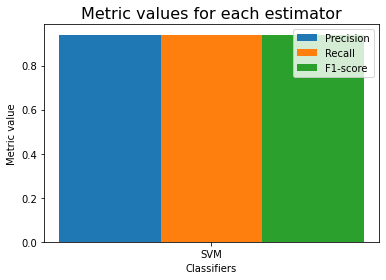

In [ ]:
X = ['SVM']
Yprecision = [np.mean(svm_precision)]
Yrecall = [np.mean(svm_recall)]
Yf1score = [np.mean(svm_f1)]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.3, Yprecision, 0.3, label = 'Precision')
plt.bar(X_axis , Yrecall, 0.3, label = 'Recall')
plt.bar(X_axis + 0.3, Yf1score, 0.3, label = 'F1-score')

plt.xticks(X_axis, X)
plt.xlabel("Classifiers")
plt.ylabel("Metric value")
plt.title("Metric values for each estimator", fontsize=16)
plt.legend()
plt.show()

####MLP Hyperparameter Optimization

Παρομοίως με το SVM, στη συνέχεια αναζητήθηκαν τιμές για την βελτιστοποίηση των υπερπαραμέτρων του MLP. Στην περίπτωση του MLP έγινε αναζήτηση για τις παρακάτω υπερπαραμέτρους:

*   Hidden layers
*   Units per hidden layer
*   solver



In [ ]:
#MLP Hyperparameter Optimization
def objective(trial):

  n_layers = trial.suggest_int('n_layers', 1, 4)
  layers = []
  solver = trial.suggest_categorical('solver',['adam','sgd'])

  for i in range(n_layers):
    layers.append(trial.suggest_int(f'n_units_{i}', 10, 100))

  mlp_clf = MLPClassifier(hidden_layer_sizes=tuple(layers))
  mlp_pipe = Pipeline(steps=[('selector',selector), ('scaler', scaler), ('sampler', ros), ('pca', pca_1),('mlp', mlp_clf)])

  sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5)

  for train_index, test_index in sss.split(train, train_labels):
    X_train, X_test = train[train_index], train[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]

  train_s, test_s, train_labels_s, test_labels_s = train_test_split(X_train, y_train, test_size=0.30)
  mlp_pipe.fit(train_s, train_labels_s)

  preds = mlp_pipe.predict(test_s)
  loss = mean_squared_error(test_labels_s, preds)

  return loss

In [ ]:
import optuna

study = optuna.create_study(direction='minimize')

study.optimize(objective, n_trials=100)

[I 2021-12-02 16:19:08,922] A new study created in memory with name: no-name-4e9ed773-bbfa-4528-b97f-2b04d184a098
[I 2021-12-02 16:21:10,890] Trial 0 finished with value: 0.11514285714285714 and parameters: {'n_layers': 3, 'solver': 'adam', 'n_units_0': 48, 'n_units_1': 97, 'n_units_2': 51}. Best is trial 0 with value: 0.11514285714285714.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

[I 2021-12-02 16:21:41,698] Trial 1 finished with value: 0.11342857142857143 and parameters: {'n_layers': 1, 'solver': 'adam', 'n_units_0': 47}. Best is trial 1 with value: 0.11342857142857143.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

[I 2021-12-02 16:22:19,612] Trial 2 fi

Από τις παραπάνω δοκιμές προέκυψε ότι ο καλύτερος συνδυασμός υπερπαραμέτρων ήταν 2 hidden layers, ένα με 59 και ένα με 51 units, και sgd solver. Παρακάτω φαίνεται η επίδοση του ταξινομητή αυτού:

In [ ]:
folds = 5

mlp_clf = MLPClassifier(hidden_layer_sizes=(59,51,), solver='sgd')
mlp_pipe = Pipeline(steps=[('selector',selector), ('scaler', scaler), ('sampler', ros), ('pca', pca_1),('mlp', mlp_clf)])                                   # initialize SVM classifier
mlp_precision=cross_val_score(mlp_pipe,train,train_labels,cv=folds,scoring='precision_weighted')
mlp_recall=cross_val_score(mlp_pipe,train,train_labels,cv=folds,scoring='recall_weighted')
mlp_f1=cross_val_score(mlp_pipe,train,train_labels,cv=folds,scoring='f1_weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

In [ ]:
# print in table:
t = Texttable()
columns = [['Classifier','Weighted Precision', 'Weighted Recall', 'Weighted F1-score']]
rows = ["MLP"]
columns.append([rows[0],np.mean(mlp_precision),np.mean(mlp_recall),np.mean(mlp_f1)])
t.add_rows(columns)
print(t.draw())

+------------+--------------------+-----------------+-------------------+
| Classifier | Weighted Precision | Weighted Recall | Weighted F1-score |
+============+====================+=================+===================+
| MLP        | 0.961              | 0.959           | 0.961             |
+------------+--------------------+-----------------+-------------------+


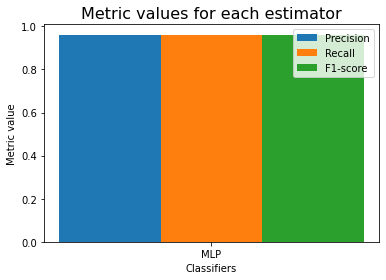

In [ ]:
X = ['MLP']
Yprecision = [np.mean(mlp_precision)]
Yrecall = [np.mean(mlp_recall)]
Yf1score = [np.mean(mlp_f1)]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.3, Yprecision, 0.3, label = 'Precision')
plt.bar(X_axis , Yrecall, 0.3, label = 'Recall')
plt.bar(X_axis + 0.3, Yf1score, 0.3, label = 'F1-score')

plt.xticks(X_axis, X)
plt.xlabel("Classifiers")
plt.ylabel("Metric value")
plt.title("Metric values for each estimator", fontsize=16)
plt.legend()
plt.show()

Τα αποτελέσματα τα οποία προκύπτουν, είναι όπως και για τον SVM παρόμοια με τα πρηγούμενα που είχαμε δει. Στη συνέχεια, παρουσιάζονται οι επιδόσεις ταξινομητών που προέκυψαν μετά από περαιτέρω δοκιμές και απέφεραν ελαφρώς καλύτερες επιδόσεις. Από αυτό, μπορούμε να καταλάβουμε τη σημασία των επαναλήψεων και πως ποσο περισσότερο έχουμε τη δυνατότητα να ερευνήσουμε πιο διεξοδικά τις τιμές των υπερπαραμέτρων τόσο καλύτερα αποτελέσματα μπορούμε να έχουμε.

#####Επιπρόσθετες δοκιμές

Ιδιαίτερο ενδιαφέρον έχουν τα αποτελέσματα μιας δοκιμής η οποία χρησιμοποιεί 2 hidden layers με πλήθος units ανά layer ίσο με τον αριθμό των χαρακτηριστικών του dataset, το οποίο θεωρείται πως είναι ο ελάχιστος απαιτούμενος αιρθμός units και προέκυψε κατά τη διάρκεια των δοκιμών. Τα αποτελέσματα φαίνονται παρακάτω:

In [ ]:
folds = 5

mlp_clf = MLPClassifier(hidden_layer_sizes=(17,17,))
mlp_pipe = Pipeline(steps=[('selector',selector), ('scaler', scaler), ('sampler', ros), ('pca', pca_1),('mlp', mlp_clf)])                                   # initialize SVM classifier
mlp_precision=cross_val_score(mlp_pipe,train,train_labels,cv=folds,scoring='precision_weighted')
mlp_recall=cross_val_score(mlp_pipe,train,train_labels,cv=folds,scoring='recall_weighted')
mlp_f1=cross_val_score(mlp_pipe,train,train_labels,cv=folds,scoring='f1_weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

In [ ]:
# print in table:
t = Texttable()
columns = [['Classifier','Weighted Precision', 'Weighted Recall', 'Weighted F1-score']]
rows = ["MLP"]
columns.append([rows[0],np.mean(mlp_precision),np.mean(mlp_recall),np.mean(mlp_f1)])
t.add_rows(columns)
print(t.draw())

+------------+--------------------+-----------------+-------------------+
| Classifier | Weighted Precision | Weighted Recall | Weighted F1-score |
+============+====================+=================+===================+
| MLP        | 0.966              | 0.965           | 0.965             |
+------------+--------------------+-----------------+-------------------+


##Αποτελέσματα και Συμπεράσματα

Παρακάτω ακολουθεί η αξιολόγηση της επίδοσης για το τελικό μοντέλο το οποίο προέκυψε, πάνω στο test set.

####Αξιολόγηση επίδοσης

In [ ]:
dummy_clf = DummyClassifier()                          # initialize dummy classifier
dummy_model = dummy_pipe.fit(train, train_labels)       # fit classifier
dummy_preds= dummy_model.predict(test)

mlp_clf = MLPClassifier(hidden_layer_sizes=(59,51,), solver='sgd')   #initialize MLP classifier
mlp_pipe = Pipeline(steps=[('selector',selector), ('scaler', scaler), ('sampler', ros), ('pca', pca_1),('mlp', mlp_clf)]) #create pipe
mlp_model = mlp_pipe.fit(train, train_labels)         # fit classifier
mlp_preds= mlp_model.predict(test)

svm_clf_pl = SVC(C=0.9680545403030303, kernel='rbf',degree=26,gamma=0.061605400671852634) #initialize SVM classifier
svm_pipe = Pipeline(steps=[('selector',selector), ('scaler', scaler), ('sampler', ros), ('pca', pca_1),('svm', svm_clf_pl)]) #create pipe
svm_model = svm_pipe.fit(train, train_labels)         # fit classifier
svm_preds= svm_model.predict(test)

dummy_metrics=precision_recall_fscore_support(test_labels, dummy_preds, average=None)  # get precision, recall, F-1 score and support for estimator
mlp_metrics=precision_recall_fscore_support(test_labels, mlp_preds, average=None)
svm_metrics=precision_recall_fscore_support(test_labels, svm_preds, average=None)
dummy_mean_metrics=precision_recall_fscore_support(test_labels, dummy_preds, average='weighted')  # get weighted (average) precision, recall, F-1 score and support for estimator
mlp_mean_metrics=precision_recall_fscore_support(test_labels, mlp_preds, average='weighted')
svm_mean_metrics=precision_recall_fscore_support(test_labels, svm_preds, average='weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
t = Texttable()

columns = [['Classifier','Precision: galaxy','Precision: QSO','Precision: star','Recall: galaxy','Recall: QSO','Recall: star','F1-score: galaxy','F1-score: QSO','F1-score: star']]
rows = ["Dummy","MLP","SVM"]
columns.append([rows[0],dummy_metrics[0][0],dummy_metrics[0][1],dummy_metrics[0][2],dummy_metrics[1][0],dummy_metrics[1][1],dummy_metrics[1][2],dummy_metrics[2][0],dummy_metrics[2][1],dummy_metrics[2][2]])
columns.append([rows[1],mlp_metrics[0][0],mlp_metrics[0][1],mlp_metrics[0][2],mlp_metrics[1][0],mlp_metrics[1][1],mlp_metrics[1][2],mlp_metrics[2][0],mlp_metrics[2][1],mlp_metrics[2][2]])
columns.append([rows[2],svm_metrics[0][0],svm_metrics[0][1],svm_metrics[0][2],svm_metrics[1][0],svm_metrics[1][1],svm_metrics[1][2],svm_metrics[2][0],svm_metrics[2][1],svm_metrics[2][2]])
t.add_rows(columns)
print(t.draw())

+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+
| Class | Preci | Preci | Preci | Recal | Recal | Recal | F1-sc | F1-sc | F1-s |
| ifier | sion: | sion: | sion: | l: ga |  l:   |  l:   | ore:  | ore:  | core |
|       | galax |  QSO  | star  | laxy  |  QSO  | star  | galax |  QSO  |  :   |
|       |   y   |       |       |       |       |       |   y   |       | star |
+=======+=======+=======+=======+=======+=======+=======+=======+=======+======+
| Dummy | 0.513 | 0     | 0     | 1     | 0     | 0     | 0.678 | 0     | 0    |
+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+
| MLP   | 0.978 | 0.896 | 0.956 | 0.961 | 0.945 | 0.964 | 0.969 | 0.920 | 0.96 |
|       |       |       |       |       |       |       |       |       | 0    |
+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+
| SVM   | 0.969 | 0.878 | 0.942 | 0.952 | 0.933 | 0.947 | 0.960 | 0.905 | 0.94 |
|       |       |       |   

In [ ]:
t = Texttable()

columns = [['Classifier','Weighted Precision', 'Weighted Recall', 'Weighted F1-score']]
rows = ["Dummy","MLP","SVM"]
columns.append([rows[0],dummy_mean_metrics[0],dummy_mean_metrics[1],dummy_mean_metrics[2]])
columns.append([rows[1],mlp_mean_metrics[0],mlp_mean_metrics[1],mlp_mean_metrics[2]])
columns.append([rows[2],svm_mean_metrics[0],svm_mean_metrics[1],svm_mean_metrics[2]])
t.add_rows(columns)
print(t.draw())

+------------+--------------------+-----------------+-------------------+
| Classifier | Weighted Precision | Weighted Recall | Weighted F1-score |
+============+====================+=================+===================+
| Dummy      | 0.263              | 0.513           | 0.348             |
+------------+--------------------+-----------------+-------------------+
| MLP        | 0.961              | 0.960           | 0.961             |
+------------+--------------------+-----------------+-------------------+
| SVM        | 0.949              | 0.948           | 0.948             |
+------------+--------------------+-----------------+-------------------+


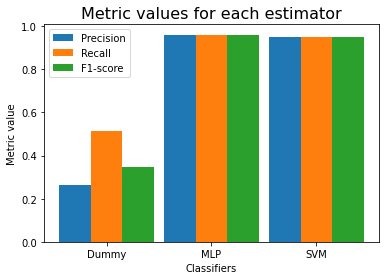

In [ ]:
X = ['Dummy','MLP','SVM']
Yprecision = [dummy_mean_metrics[0],mlp_mean_metrics[0],svm_mean_metrics[0]]
Yrecall = [dummy_mean_metrics[1],mlp_mean_metrics[1],svm_mean_metrics[1]]
Yf1score = [dummy_mean_metrics[2],mlp_mean_metrics[2],svm_mean_metrics[2]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.3, Yprecision, 0.3, label = 'Precision')
plt.bar(X_axis , Yrecall, 0.3, label = 'Recall')
plt.bar(X_axis + 0.3, Yf1score, 0.3, label = 'F1-score')

plt.xticks(X_axis, X)
plt.xlabel("Classifiers")
plt.ylabel("Metric value")
plt.title("Metric values for each estimator", fontsize=16)
plt.legend()
plt.show()

Τελικά, παρατηρείται βελτίωση των αποτελεσμάτων, σε σχέση με τις out-of-the-box επιδόσεις, αφού οι επιδόσεις στο test set μετά την βελτιστοποίηση είναι υψηλότερες περίπου κατά 50%.

Οι καλύτερες επιδόσεις συνεχίζουν να εμφανίζονται για την κλάση 'galaxy', με την οποία όμως έχει πλέον παρόμοια αποτελέσματα και η κλάση 'star' με την 'QSO' να ακολουθεί.

Αν και παρατηρείται βελτίωση των επιδόσεων σε όλες τις κλάσεις και για τους δύο ταξινομητές η σημαντικότερη είναι αυτή της κλάσης 'QSO'. Οι κακές επιδόσεις του out-of-the-box μοντέλου για τη συγκεκριμένη κλάση οφείλονταν στο γεγονός ότι ήταν αυτή με τα λιγότερα δείγματα, πρόβλημα το οποίο όμως λύνεται με την προεπεξεργασία των δεδομένων και ιδιαίτερα το oversampling. Ειδικότερα, βλέπουμε πως πλέον τόσο το precision όσο και το recall που έπασχαν από μηδενικές ή σχεδόν μηδενικές επιδόσεις στο out-of-the-box μοντέλο, μπορούν να συναγωνιστούν αυτές των αντίστοιχων επιδόσεων για τις άλλες δύο κλάσεις και για τους δύο ταξινομητές.

Επιπλέον, το γεγονός ότι τα αποτελέσματα των επιδόσεων είναι πλέον παρόμοια για τις 3 κλάσεις σημαίνει πως και οι mean τιμές που παίρνουμε για τις επιδόσεις είναι πιο αντιπροσωπευτικές όσον αφορά την ικανότητα ταξινόμησης, ειδικότερα για τις κλάσεις 'galaxy' και 'star', που τα μεμονωμένα αποτελέσματα είναι σχεδόν ίδια με τις mean τιμές του συνόλου των κλάσεων.

Γενικά κατά τη διάρκεια των δοκιμών και του χτισίματος του μοντέλου, οι δύο ταξινομητές παρουσίασαν παρόμοια συμπεριφορά και δεν προέκυψε κάποια διαφοροποίηση όσον αφορά τη δομή της προεπεξεργασίας ή τα στάδια του pipeline. Αυτό αντανακλάται και στα τελικά αποτελέσματα, με τον MLP να υπερτερεί με μια μικρή διαφορά της τάξης μόλις του 1-2%.

Συνολικά, και αφού προηγήθηκε και αναζήτηση για την εύρεση των βέλτιστων υπερπαραμέτρων, καταλήγουμε στο συμπέρασμα ότι για το συγκεκριμένο dataset θα ήταν προτιμότερος ένας MLP ταξινομητής με sgd solver και 2 hidden layers, που θα μπορούσαν να έχουν (59, 51) ή (17,17) units (παρουσιάζονται και τα δύο ζεύγη αφού προέκυψαν παρόμοιες τιμές για τις επιδόσεις τους με τη χρήση cross validation).